Loaded 4096 codes
ADC range: 13 - 4092


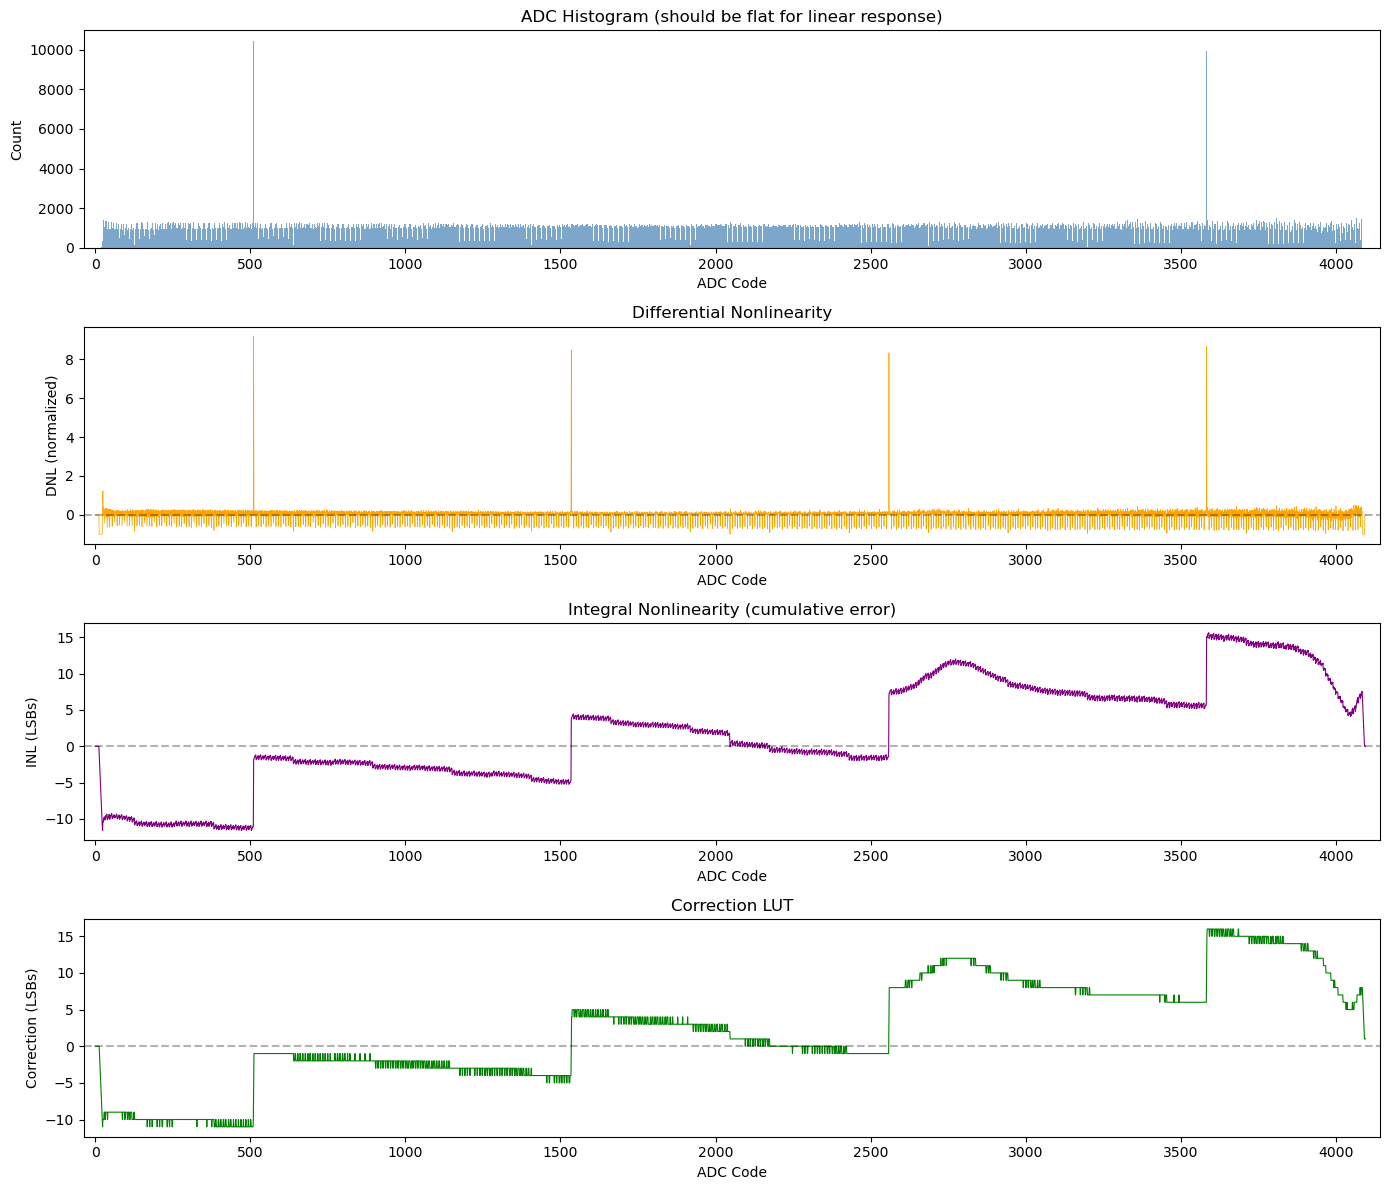


=== Statistics ===
ADC range: 13 - 4092 (4080 codes)
Mean counts/code: 1028.0
DNL range: -1.00 to 9.17
INL range: -11.6 to 15.6 LSBs
Correction range: -11 to +16 LSBs
Codes with zero counts: 7

=== Anomalies ===
Spike codes (>5x expected): [511, 1535, 2559, 3583]
  Code 511: 10450 counts (10.2x)
  Code 1535: 9735 counts (9.5x)
  Code 2559: 9587 counts (9.3x)
  Code 3583: 9935 counts (9.7x)
Missing codes: [15, 16, 2047, 4087, 4088, 4089, 4090]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Paste your raw data here (just the comma-separated numbers)
raw_data = """
0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,3,2,3,3,24,20,19,334,2301,983,1424,1009,1327,1080,582,992,1351,978,1401,929,1347,995,338,940,1337,981,1318,919,1336,975,392,1172,1318,975,1250,978,1297,928,425,985,1278,979,1251,955,1252,939,660,1039,1230,980,1205,1002,1266,944,454,977,1263,995,1221,970,1267,960,490,1191,1209,962,1204,1029,1232,975,448,928,1275,987,1194,1004,1217,963,678,948,1269,987,1230,983,1208,988,425,926,1319,977,1220,1005,1205,974,454,1121,1309,939,1260,974,1223,972,437,906,1299,936,1268,1000,1219,933,168,1003,1279,967,1268,952,1251,991,439,958,1274,961,1274,975,1210,992,476,1138,1264,968,1251,960,1291,983,402,945,1282,981,1286,950,1229,1023,612,966,1252,950,1285,943,1305,972,427,932,1306,929,1282,931,1322,998,440,1130,1263,967,1331,889,1296,989,422,960,1243,942,1313,912,1310,966,638,962,1273,1000,1284,960,1292,956,395,984,1230,999,1279,924,1279,976,473,1127,1228,1035,1233,984,1288,933,448,951,1256,1011,1249,970,1307,958,630,973,1269,1021,1229,969,1291,969,423,951,1246,1004,1235,956,1291,968,476,1133,1264,1010,1242,981,1295,950,420,952,1274,976,1244,962,1303,959,578,1149,1313,971,1272,962,1281,998,400,959,1262,985,1271,990,1243,1009,434,1137,1293,956,1266,958,1285,978,392,942,1261,990,1314,947,1256,1037,570,1007,1281,981,1283,963,1248,980,382,983,1273,975,1285,967,1255,978,408,1186,1265,973,1266,968,1294,988,366,993,1232,988,1277,948,1324,986,600,978,1262,1008,1265,948,1248,963,404,1012,1247,974,1292,961,1279,969,459,1129,1274,981,1294,986,1257,1000,417,937,1231,966,1323,934,1282,995,587,1012,1253,1003,1285,966,1258,955,403,943,1276,987,1268,986,1259,992,455,1119,1256,1001,1312,943,1258,1024,364,960,1252,1011,1248,991,1226,965,198,992,1274,974,1253,988,1261,1009,415,1004,1234,1000,1258,957,1232,1016,435,1147,1281,951,1241,999,1250,1054,369,984,1247,992,1225,1003,1261,1042,563,981,1300,971,1246,971,1271,977,418,918,1265,1006,1273,950,1284,1006,466,1159,1179,1027,1267,944,1275,1004,401,961,1260,1002,1256,975,1247,1002,608,982,1235,1004,1256,995,1257,999,395,982,1182,1039,1258,971,1270,960,461,1119,1295,965,1262,947,1241,993,417,959,1248,1015,1266,979,1291,979,616,980,1209,1073,1220,934,1303,991,401,982,1245,1009,1266,979,1270,1034,460,1117,1256,983,1243,963,1217,1025,397,971,1258,1017,1244,976,1239,1021,10450,1112,1226,1044,1245,962,1243,1013,394,997,1252,996,1235,991,1231,1042,461,1127,1251,1009,1249,990,1233,995,391,969,1269,988,1247,993,1224,1019,565,1059,1231,1028,1253,950,1227,1025,377,985,1222,1021,1242,957,1226,1068,464,1147,1241,1036,1235,922,1259,969,410,967,1260,1017,1233,960,1268,1005,591,1025,1240,1017,1247,995,1211,1016,398,964,1261,1004,1262,993,1241,987,446,1159,1208,1017,1269,982,1250,1010,373,986,1225,1025,1248,988,1216,1032,549,1036,1254,992,1239,980,1247,983,418,984,1251,1050,1203,988,1212,1003,459,1175,1217,1038,1249,977,1213,1049,381,992,1231,986,1236,998,1202,960,167,1047,1223,1009,1268,1006,1182,1045,393,984,1239,1022,1274,948,1261,1034,416,1194,1226,987,1292,954,1235,999,396,990,1261,999,1239,995,1244,1005,517,1052,1245,1026,1217,960,1273,1014,386,985,1193,1056,1250,958,1218,1017,449,1144,1236,1069,1245,983,1214,1029,391,979,1244,1031,1255,977,1192,1029,610,979,1244,1031,1229,968,1233,1051,343,1003,1249,1032,1252,945,1253,1008,458,1119,1233,1037,1275,974,1207,1033,374,960,1222,1036,1262,972,1236,1020,564,1048,1220,1012,1281,987,1201,1025,381,973,1294,1002,1229,958,1265,998,423,1180,1190,1026,1242,1007,1208,1053,367,950,1263,1007,1263,981,1214,1036,589,1164,1218,1077,1192,975,1245,1044,332,1020,1216,1057,1223,1009,1202,1033,455,1139,1233,1022,1241,1017,1203,1013,389,963,1244,1015,1276,1000,1223,1021,516,1085,1223,1031,1223,1017,1187,1007,364,1017,1229,1032,1237,1003,1195,1060,418,1143,1231,1028,1248,960,1201,1045,376,983,1243,1047,1235,978,1167,1058,617,1018,1228,1005,1243,997,1187,1038,352,1004,1250,1037,1227,1016,1183,1055,439,1137,1202,1062,1246,985,1178,1052,382,961,1204,1079,1212,1000,1164,1085,507,1094,1204,1033,1264,957,1219,1050,376,981,1233,1053,1211,1023,1185,1054,429,1152,1219,1053,1239,973,1221,1034,356,1027,1178,1060,1246,961,1208,1006,161,1010,1225,1058,1232,970,1211,1047,364,986,1185,1068,1224,991,1220,1027,452,1140,1221,1064,1217,970,1239,1032,367,990,1236,1039,1273,952,1240,1067,502,1052,1184,1094,1207,971,1222,1053,377,979,1205,1087,1200,988,1231,1027,447,1149,1197,1094,1229,981,1221,1039,377,971,1207,1072,1198,1028,1219,1060,554,999,1221,1062,1207,1014,1214,1026,335,990,1208,1066,1215,1013,1202,1036,411,1153,1224,1048,1216,1029,1171,1049,372,1016,1185,1036,1224,1003,1198,1039,529,1060,1246,1035,1262,987,1228,1004,391,977,1223,1063,1223,992,1189,1054,438,1141,1201,1045,1254,997,1187,1041,360,990,1198,1054,1261,964,1203,1059,577,1116,1204,1070,1214,999,1185,1035,381,1035,1158,1111,1234,1006,1208,1039,404,1205,1136,1084,1232,976,1196,1058,375,1003,1179,1052,1264,958,1173,1097,505,1101,1183,1013,1255,983,1177,1084,356,982,1167,1093,1262,961,1169,1059,432,1187,1163,1100,1258,948,1196,1063,346,1020,1170,1075,1223,968,1194,1090,520,1044,1197,1098,1201,997,1201,1006,401,1004,1238,1062,1237,984,1215,1069,410,1154,1172,1038,1256,997,1195,1015,354,1025,1209,1074,1203,1011,1220,1061,475,1098,1218,1054,1218,1017,1165,1080,330,1006,1220,1086,1208,975,1227,1021,417,1163,1214,1048,1223,1008,1159,1044,323,1064,1195,1033,1250,1017,1161,976,149,1085,1191,1063,1239,998,1175,1041,354,1026,1196,1059,1236,1035,1149,1076,392,1207,1136,1103,1177,1008,1203,1085,322,1001,1190,1052,1252,973,1185,1032,463,1138,1203,1070,1235,1009,1219,1033,343,1013,1206,1060,1207,985,1209,1063,422,1170,1175,1061,1246,988,1187,1055,339,1027,1193,1116,1196,988,1213,1069,564,1030,1198,1109,1195,1012,1176,1077,347,1019,1175,1057,1204,1035,1150,1063,445,1182,1140,1046,1272,990,1173,1074,355,1037,1195,1040,1233,984,1185,1103,464,1104,1191,1058,1221,979,1155,1078,358,1023,1157,1087,1227,992,1149,1114,390,1220,1148,1106,1227,1006,1174,1059,338,1047,1168,1084,1240,994,1181,1065,543,1210,1151,1089,1225,1034,1171,1085,327,1049,1157,1103,1199,990,1202,1054,419,1162,1165,1084,1212,1009,1152,1101,324,1052,1154,1065,1195,995,1187,1067,504,1150,1135,1072,1185,1069,1172,1061,342,1050,1181,1081,1198,1031,1147,1048,455,1183,1198,1033,1234,1007,1147,1051,344,1028,1174,1108,1196,1008,1179,1077,533,1045,1157,1135,1184,996,1163,1115,313,1041,1190,1069,1206,1012,1136,1086,415,1200,1144,1060,1224,1052,1184,1045,349,998,1168,1123,1211,1016,1137,1065,492,1115,1149,1121,1203,1045,1138,1069,359,1030,1156,1070,1187,1022,1142,1106,439,1116,1178,1080,1189,1031,1136,1065,359,1018,1163,1098,1200,1035,1145,1018,174,1048,1170,1102,1192,1019,1187,1076,344,1057,1157,1081,1213,1048,1150,1106,423,1171,1143,1106,1202,994,1179,1077,331,1027,1175,1063,1219,989,1180,1087,450,1163,1131,1124,1189,1029,1149,1079,322,1044,1095,1152,1204,983,1137,1060,406,1173,1158,1106,1230,1010,1141,1089,345,1038,1164,1079,1225,1029,1163,1102,565,1015,1161,1124,1219,1017,1128,1087,339,1022,1112,1116,1238,979,1132,1127,422,1152,1159,1092,1182,1038,1137,1061,353,1057,1141,1082,1209,1044,1130,1125,439,1140,1142,1116,1217,1049,1137,1084,348,1065,1165,1126,1175,1040,1163,1073,415,1182,1150,1093,1197,1017,1158,1056,371,1014,1114,1106,1205,1003,1138,1148,9735,1194,1132,1107,1213,992,1119,1133,323,1043,1132,1121,1232,992,1143,1083,415,1173,1215,1060,1197,1011,1151,1062,321,1057,1131,1121,1197,1039,1183,1084,431,1175,1134,1113,1205,1046,1135,1083,324,1029,1163,1106,1164,1060,1134,1134,396,1199,1141,1106,1213,992,1130,1089,339,1024,1162,1123,1216,985,1125,1136,512,1056,1173,1098,1195,1039,1123,1125,330,1054,1136,1115,1189,1049,1149,1094,407,1187,1129,1125,1179,1058,1092,1093,348,1022,1158,1147,1189,1021,1153,1114,439,1151,1142,1107,1184,1025,1157,1064,339,1037,1117,1142,1189,1037,1138,1088,439,1155,1158,1150,1198,1010,1101,1133,315,1102,1112,1114,1192,1027,1170,972,126,1147,1132,1124,1159,1004,1122,1095,334,1062,1154,1109,1188,1027,1159,1085,402,1213,1136,1111,1207,1026,1149,1074,310,1050,1158,1097,1181,1044,1103,1115,438,1156,1131,1093,1178,1043,1141,1098,312,1050,1155,1119,1214,1042,1142,1119,425,1161,1139,1122,1186,1049,1099,1095,322,1035,1128,1136,1210,1019,1119,1123,519,1058,1148,1096,1186,1035,1086,1080,324,1070,1121,1115,1197,1057,1097,1102,420,1209,1114,1133,1222,1018,1143,1073,341,1069,1147,1161,1189,996,1112,1108,452,1160,1144,1113,1189,1022,1155,1084,329,1057,1163,1112,1176,1066,1109,1122,409,1194,1106,1141,1170,969,1156,1081,329,1043,1129,1114,1221,1002,1138,1104,550,1176,1160,1152,1170,1048,1088,1094,343,1091,1121,1135,1149,1048,1105,1171,364,1219,1116,1131,1163,1030,1178,1062,315,1079,1091,1148,1175,1006,1140,1124,423,1185,1093,1119,1226,1017,1130,1122,313,1079,1098,1153,1179,1063,1130,1110,435,1179,1160,1124,1176,1033,1118,1087,317,1103,1090,1112,1207,1024,1087,1143,506,1084,1131,1109,1176,1073,1066,1122,313,1087,1109,1138,1218,1030,1074,1133,400,1209,1112,1113,1166,1056,1106,1126,316,1019,1173,1107,1217,1019,1134,1111,423,1198,1135,1141,1191,1027,1086,1127,335,1051,1114,1173,1155,1037,1145,1159,399,1218,1070,1164,1203,1036,1121,1124,300,1078,1112,1138,1161,1040,1078,1036,133,1118,1099,1159,1187,1034,1091,1106,320,1091,1117,1144,1142,1025,1113,1109,412,1170,1111,1113,1200,1041,1099,1072,337,1094,1116,1145,1197,1093,1115,1120,443,1161,1101,1168,1207,1062,1060,1124,286,1087,1103,1170,1194,1003,1074,1156,433,1157,1071,1166,1173,1035,1088,1142,306,1097,1103,1170,1146,1031,1114,1121,549,1070,1100,1135,1190,1031,1127,1092,298,1080,1132,1171,1153,1048,1096,1115,424,1199,1104,1157,1193,1022,1106,1144,313,1074,1103,1165,1196,1006,1152,1123,436,1198,1108,1146,1175,1029,1044,1126,321,1061,1090,1105,1187,1025,1129,1109,404,1214,1101,1142,1190,1062,1102,1130,310,1048,1064,1181,1161,1040,1025,124,0,1331,1124,1197,1187,1044,1107,1113,296,1087,1104,1114,1182,1059,1087,1133,413,1224,1083,1181,1152,1067,1090,1114,316,1118,1059,1177,1109,1039,1139,1134,370,1281,1077,1151,1192,1033,1106,1103,295,1096,1055,1169,1135,1067,1069,1135,406,1214,1086,1143,1196,1047,1103,1107,290,1123,1087,1186,1191,1035,1100,1144,437,1127,1101,1136,1180,1046,1113,1098,295,1107,1130,1159,1160,1066,1084,1129,412,1218,1086,1115,1205,1054,1045,1143,276,1111,1069,1115,1262,1005,1080,1180,368,1244,1098,1168,1183,1092,1064,1148,287,1093,1051,1169,1202,1050,1021,1193,363,1215,1094,1165,1162,1064,1076,1143,290,1098,1075,1151,1184,1053,1057,1055,90,1184,1033,1203,1145,1052,1085,1138,279,1102,1057,1193,1179,1030,1105,1132,399,1184,1101,1172,1215,1050,1085,1152,326,1058,1125,1154,1179,1085,1069,1143,398,1251,1093,1186,1194,1039,1085,1142,268,1122,1094,1150,1168,1012,1056,1144,398,1205,1095,1140,1167,1030,1073,1145,308,1065,1074,1228,1123,1041,1110,1145,471,1083,1087,1167,1217,1035,1061,1107,302,1142,1085,1160,1184,1026,1068,1179,395,1243,1068,1209,1188,1095,1041,1139,267,1133,1083,1205,1145,1018,1086,1144,404,1234,1050,1181,1103,1093,1062,1135,304,1069,1096,1190,1145,1112,1062,1128,361,1202,1089,1177,1130,1067,1065,1115,308,1116,1116,1178,1150,1078,1093,1178,454,1278,1053,1164,1162,1081,1074,1131,280,1097,1098,1200,1167,1074,1055,1126,399,1208,1107,1171,1152,1054,1044,1164,295,1097,1079,1188,1136,1061,1072,1163,350,1292,1056,1224,1194,1047,1086,1134,282,1136,1094,1153,1187,1039,1045,1191,361,1176,1048,1170,1161,1087,1050,1125,296,1121,1087,1218,1182,1053,1048,1213,457,1157,1033,1188,1147,1101,1062,1142,289,1100,1050,1166,1168,1057,1043,1186,366,1204,1062,1179,1150,1062,1023,1174,258,1144,1041,1163,1220,1060,1047,1133,357,1279,1070,1175,1161,1055,1048,1181,286,1075,1083,1189,1172,1071,1100,1177,422,1203,1063,1197,1150,1049,1056,1141,281,1077,1043,1153,1134,1114,1058,1067,86,1187,1045,1237,1159,1115,1007,1149,296,1095,1068,1199,1158,1048,1052,1198,383,1193,1105,1190,1171,1043,1073,1145,301,1131,1076,1196,1182,1075,1058,1147,352,1308,1049,1196,1163,1071,1050,1191,269,1108,1081,1159,1197,1089,1001,1150,415,1263,1044,1192,1136,1060,1077,1122,300,1107,1055,1222,1160,1083,1033,1174,483,1156,1066,1196,1161,1060,1077,1168,310,1133,1058,1208,1131,1073,1070,1156,415,1202,1064,1176,1124,1127,1018,1141,286,1135,1053,1209,1147,1080,1026,1169,379,1323,1010,1191,1113,1068,1061,1175,305,1141,1056,1202,1179,1089,1076,1168,419,1201,1070,1209,1191,1057,995,1198,288,1074,1042,1192,1199,1035,1020,1195,9587,1392,1018,1234,1116,1053,1089,1135,274,1122,1054,1241,1126,1109,1043,1191,419,1251,1007,1192,1172,1112,1097,1166,252,1142,1037,1256,1135,1082,1111,1128,331,1303,1047,1195,1200,1102,1038,1136,287,1160,1039,1236,1142,1096,1106,1223,388,1220,1069,1236,1189,1088,1065,1164,275,1145,1085,1214,1183,1105,1061,1213,434,1211,1096,1186,1194,1090,1068,1175,289,1189,1044,1203,1170,1134,1066,1181,381,1265,1028,1256,1176,1112,1085,1179,273,1188,1087,1259,1171,1140,1096,1269,350,1301,1012,1335,1215,1133,1051,1193,300,1172,1137,1261,1151,1135,1050,1254,418,1260,1143,1234,1140,1138,1111,1188,293,1151,1065,1249,1224,1109,1083,1071,80,1256,1083,1285,1222,1098,1055,1197,275,1189,1094,1319,1170,1141,1046,1241,375,1320,1051,1227,1203,1088,1036,1239,294,1182,1075,1323,1147,1129,1071,1186,351,1349,1019,1291,1211,1093,1042,1264,267,1192,1050,1262,1198,1120,1079,1229,389,1251,1098,1239,1187,1108,999,1188,283,1172,1031,1272,1139,1094,1070,1282,459,1154,1046,1246,1128,1138,1031,1193,251,1125,1034,1219,1157,1086,1060,1216,395,1244,997,1293,1119,1121,1043,1198,257,1137,1021,1236,1116,1125,1008,1156,343,1295,1024,1256,1077,1079,1011,1150,250,1127,1061,1231,1138,1078,988,1216,390,1226,1005,1237,1141,1082,1015,1153,269,1140,1018,1217,1146,1046,989,1187,468,1369,960,1206,1066,1076,997,1209,271,1135,980,1195,1119,1108,994,1175,375,1166,1027,1195,1118,1089,1001,1110,247,1186,971,1217,1128,1065,989,1152,315,1280,966,1211,1163,1069,978,1162,257,1153,997,1208,1062,1136,986,1158,350,1230,971,1248,1084,1060,976,1163,252,1163,973,1237,1067,1071,1030,1169,441,1185,994,1196,1101,1096,973,1195,252,1138,1012,1166,1136,1056,1039,1223,372,1126,995,1266,1106,1088,969,1147,282,1102,1002,1273,1120,1066,991,1159,304,1325,989,1240,1096,1077,996,1136,272,1158,1030,1216,1127,1100,1029,1182,364,1239,1006,1224,1108,1108,989,1158,284,1125,1013,1225,1091,1036,1039,1060,72,1255,998,1194,1118,1117,1026,1179,256,1112,1030,1265,1171,1073,1008,1173,367,1251,1007,1214,1103,1098,971,1182,273,1129,1022,1240,1150,1110,964,1203,337,1339,1000,1218,1141,1089,1029,1203,273,1125,1011,1195,1138,1063,1014,1216,402,1145,1020,1253,1130,1075,963,1216,295,1156,1006,1235,1150,1103,1023,1186,440,1175,969,1209,1148,1091,991,1176,235,1164,975,1213,1166,1092,1000,1239,384,1216,981,1222,1109,1088,979,1201,278,1165,992,1228,1118,1064,992,1237,327,1292,987,1287,1126,1063,1021,1151,270,1147,935,1268,1125,1031,988,1231,405,1213,1005,1296,1113,1122,1019,1154,278,1168,1022,1223,1147,1095,948,1220,194,1377,979,1294,1098,1087,1016,1218,266,1170,982,1275,1154,1056,954,1280,327,1298,1000,1241,1063,1105,979,1246,255,1133,963,1285,1112,1093,1025,1197,262,1385,978,1243,1122,1096,962,1208,257,1181,972,1277,1156,1153,973,1276,370,1177,1021,1221,1114,1097,965,1215,230,1168,1008,1303,1087,1113,1008,1228,392,1277,1004,1190,1182,1096,969,1202,236,1172,955,1283,1132,1074,1002,1239,368,1189,998,1236,1142,1158,997,1161,235,1199,947,1264,1190,1124,997,1262,286,1296,1035,1233,1081,1125,941,1218,268,1190,986,1247,1121,1122,1010,1184,391,1188,981,1312,1094,1101,973,1199,259,1200,993,1272,1109,1090,986,1090,55,1278,990,1278,1106,1171,946,1174,238,1206,971,1280,1124,1082,985,1218,391,1230,939,1257,1151,1124,971,1201,239,1232,969,1267,1150,1128,962,1201,276,1401,999,1292,1077,1053,936,1258,255,1209,946,1247,1140,1116,963,1239,351,1165,972,1317,1089,1118,991,1232,264,1168,1002,1317,1143,1096,1004,1251,391,1228,1007,1293,1080,1145,973,1199,265,1205,1024,1279,1079,1139,979,1248,380,1219,929,1292,1130,1129,952,1224,234,1199,936,1270,1116,1111,991,1211,287,1334,994,1308,1095,1108,1003,1200,251,1159,968,1322,1093,1126,906,1232,414,1227,958,1314,1093,1115,1008,1200,225,1155,984,1336,1096,1083,1001,1219,416,1392,934,1215,1121,1096,967,1221,224,1204,1045,1294,1101,1070,950,1278,351,1295,923,1299,1072,1139,963,1214,223,1233,947,1286,1119,1108,983,1194,266,1447,958,1295,1067,1089,963,1278,218,1130,994,1264,1110,1137,955,1293,347,1283,990,1327,1117,1128,893,1236,254,1205,910,1343,1022,1173,945,1192,407,1208,983,1347,1046,1077,961,1238,289,1235,935,1280,1105,1094,977,1305,383,1259,946,1290,1074,1076,1005,1210,244,1222,928,1258,1155,1126,929,1202,272,1352,942,1266,1123,1118,933,1246,265,1166,975,1304,1091,1074,992,1227,370,1259,948,1272,1121,1105,949,1227,244,1173,946,1264,1120,1092,977,1068,50,1305,924,1297,1147,1145,952,1214,238,1255,1008,1344,1104,1154,925,1192,383,1239,926,1339,1066,1130,986,1187,241,1252,916,1309,1119,1125,918,1284,261,1358,955,1346,1135,1103,964,1219,222,1170,968,1283,1111,1169,943,1275,376,1243,954,1313,1083,1100,963,1204,237,1241,917,1296,1051,1092,982,1325,365,1198,962,1301,1056,1168,944,1204,250,1171,966,1312,1065,1129,912,1299,396,1255,943,1290,1087,1113,976,1282,239,1152,942,1375,1166,1109,965,1206,269,1434,910,1339,1096,1131,915,1263,238,1217,931,1269,1112,1126,913,1318,371,1215,995,1282,1137,1104,943,1210,241,1175,918,1275,1123,1128,973,1385,9935,1499,941,1428,1102,1086,930,1248,230,1180,975,1340,1076,1061,895,1184,374,1335,956,1351,1106,1114,941,1225,200,1194,933,1295,1137,1188,919,1237,221,1337,921,1379,1109,1107,921,1249,234,1259,932,1320,1073,1113,984,1236,361,1230,961,1293,1053,1097,893,1168,237,1269,974,1330,1105,1130,972,1252,379,1223,976,1342,1119,1172,943,1263,205,1141,892,1346,1112,1120,965,1258,366,1321,903,1301,1124,1091,853,1277,237,1250,956,1330,1061,1091,845,1269,267,1476,843,1251,1152,1154,935,1262,240,1175,919,1331,1063,1136,933,1278,374,1264,855,1336,1095,1108,932,1251,254,1215,920,1331,1184,1122,909,1112,45,1324,929,1339,1073,1145,919,1153,252,1206,962,1261,1072,1186,905,1271,369,1199,960,1285,1094,1101,876,1268,242,1245,964,1357,1057,1118,895,1325,235,1413,859,1379,1097,1123,933,1206,229,1278,959,1380,1070,1079,910,1192,388,1307,902,1314,1033,1131,934,1373,247,1242,1017,1334,1086,1059,912,1274,401,1261,880,1361,1038,1150,926,1192,209,1192,907,1291,1081,1125,970,1276,377,1228,914,1341,1150,1112,935,1230,212,1297,951,1324,1010,1163,935,1253,275,1505,914,1265,1102,1200,923,1263,194,1148,918,1378,1070,1168,903,1223,362,1249,917,1336,1136,1128,927,1244,208,1173,888,1314,1062,1063,899,1243,471,1381,902,1356,1070,1180,881,1177,258,1280,912,1310,1154,1145,795,1257,366,1261,886,1361,1078,1128,914,1295,239,1168,891,1421,1041,1101,907,1237,204,1472,886,1323,1065,1212,825,1173,230,1186,941,1290,1028,1069,913,1182,337,1293,951,1315,1026,1064,979,1200,226,1311,980,1401,996,1047,885,1282,345,1240,896,1378,1046,1165,916,1228,204,1156,842,1340,1056,1062,891,1274,349,1220,899,1350,1083,1108,745,1259,230,1246,874,1349,983,1154,856,1107,200,1465,965,1261,1037,1060,788,1282,224,1209,830,1320,1065,1089,959,1287,410,1214,770,1235,1058,1074,850,1224,199,1082,783,1289,1018,1109,843,1056,45,1308,870,1265,892,1102,782,1189,231,1165,866,1301,1038,971,859,1267,333,1153,713,1370,983,1076,862,1157,249,1137,751,1323,885,1009,834,1118,238,1499,826,1206,914,1033,961,1032,213,1193,792,1291,1067,1025,760,1361,369,1056,727,1244,1052,1123,767,1212,185,1104,877,1203,951,998,777,1261,417,1150,855,1266,1079,1094,827,1204,199,1230,842,1347,982,1137,821,1327,389,1322,866,1387,1176,1343,1058,1213,207,1277,931,1545,1113,1209,991,1290,254,1521,1059,1520,1213,1364,987,1448,262,1518,945,1425,1133,1248,902,1325,408,1419,979,1445,1045,1222,447,19,0,0,0,0,1,1,0,0,0,
"""

# Parse - strip whitespace, remove any trailing commas/timestamps, split by comma
cleaned = raw_data.strip().rstrip(',')
# Remove any timestamp lines like "13:36:40.024 ->"
cleaned = cleaned.split('\n')[0] if '\n' in cleaned else cleaned

values = [int(x) for x in cleaned.split(',') if x.strip().isdigit()]
histogram = np.array(values[:4096])  # Take first 4096 values

print(f"Loaded {len(histogram)} codes")

# Find valid range
nonzero = np.where(histogram > 0)[0]
code_min, code_max = nonzero[0], nonzero[-1]
print(f"ADC range: {code_min} - {code_max}")

# Calculate DNL
valid_hist = histogram[code_min:code_max+1]
expected = valid_hist.mean()
dnl = (histogram - expected) / expected
dnl[:code_min] = 0
dnl[code_max+1:] = 0

# Calculate INL (cumulative DNL)
inl = np.cumsum(dnl)

# Build correction LUT (same algorithm as C code)
correction = np.zeros(4096, dtype=int)
cumulative = 0
for i in range(4096):
    if i < code_min:
        correction[i] = 0
    elif i > code_max:
        correction[i] = correction[code_max]
    else:
        cumulative += histogram[i] / 2.0
        ideal_code = code_min + (cumulative / expected)
        correction[i] = int(round(ideal_code)) - i
        cumulative += histogram[i] / 2.0

# Plot
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Plot 1: Histogram
axes[0].bar(range(4096), histogram, width=1, color='steelblue', alpha=0.7)
axes[0].set_xlabel('ADC Code')
axes[0].set_ylabel('Count')
axes[0].set_title('ADC Histogram (should be flat for linear response)')
axes[0].set_xlim(code_min - 50, code_max + 50)

# Plot 2: DNL
axes[1].plot(range(4096), dnl, color='orange', linewidth=0.5)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1].set_xlabel('ADC Code')
axes[1].set_ylabel('DNL (normalized)')
axes[1].set_title('Differential Nonlinearity')
axes[1].set_xlim(code_min - 50, code_max + 50)

# Plot 3: INL
axes[2].plot(range(4096), inl, color='purple', linewidth=0.8)
axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[2].set_xlabel('ADC Code')
axes[2].set_ylabel('INL (LSBs)')
axes[2].set_title('Integral Nonlinearity (cumulative error)')
axes[2].set_xlim(code_min - 50, code_max + 50)

# Plot 4: Correction LUT
axes[3].plot(range(4096), correction, color='green', linewidth=0.8)
axes[3].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[3].set_xlabel('ADC Code')
axes[3].set_ylabel('Correction (LSBs)')
axes[3].set_title('Correction LUT')
axes[3].set_xlim(code_min - 50, code_max + 50)

plt.tight_layout()
plt.savefig('adc_calibration.png', dpi=150)
plt.show()

# Statistics
print(f"\n=== Statistics ===")
print(f"ADC range: {code_min} - {code_max} ({code_max - code_min + 1} codes)")
print(f"Mean counts/code: {expected:.1f}")
print(f"DNL range: {dnl[code_min:code_max+1].min():.2f} to {dnl[code_min:code_max+1].max():.2f}")
print(f"INL range: {inl.min():.1f} to {inl.max():.1f} LSBs")
print(f"Correction range: {correction.min():+d} to {correction.max():+d} LSBs")
print(f"Codes with zero counts: {(histogram[code_min:code_max+1] == 0).sum()}")

# Find spikes (likely the DNL problem areas around 512, 1024, 2048, 3072)
print(f"\n=== Anomalies ===")
spike_threshold = 5  # counts > 5x expected
spikes = np.where(histogram > expected * spike_threshold)[0]
if len(spikes) > 0:
    print(f"Spike codes (>{spike_threshold}x expected): {spikes.tolist()}")
    for s in spikes[:10]:
        print(f"  Code {s}: {histogram[s]} counts ({histogram[s]/expected:.1f}x)")

# Missing codes
missing = np.where(histogram[code_min:code_max+1] == 0)[0] + code_min
if len(missing) > 0:
    print(f"Missing codes: {missing.tolist()[:20]}{'...' if len(missing) > 20 else ''}")

In [2]:
# comparing ADC channels


In [15]:
adc0 = np.array([3,0,0,1,1,0,0,0,0,0,1,0,0,3,0,0,4,1,1,6,6,12,20,5,23,57,168,726,434,344,256,119,285,295,264,322,287,341,233,116,278,326,265,340,254,377,230,139,278,361,228,376,234,379,232,116,217,372,242,343,224,361,237,164,275,402,197,345,230,329,253,102,228,364,230,373,250,344,276,142,215,345,259,307,251,280,251,94,235,328,241,314,281,334,276,158,214,281,246,292,266,274,291,87,221,326,257,329,255,295,300,127,243,329,240,294,221,292,269,97,242,316,234,287,269,294,254,45,239,354,217,309,233,320,192,102,246,299,231,328,213,338,218,141,259,339,230,328,236,308,251,93,205,296,226,369,190,321,223,167,217,355,224,323,236,322,275,93,223,328,217,314,216,325,251,129,210,324,211,341,229,291,263,98,227,335,215,301,218,300,234,162,208,326,200,300,253,290,264,106,238,346,215,311,250,293,244,126,260,337,272,305,220,294,251,94,252,329,212,301,208,313,254,156,225,342,219,306,277,293,275,79,261,345,245,303,221,334,263,118,270,310,220,319,275,313,271,91,223,339,234,329,274,287,260,140,251,281,292,289,287,255,266,81,264,297,250,309,298,307,287,107,241,331,273,250,294,281,265,56,256,345,259,240,266,304,316,109,258,304,265,237,263,316,257,70,250,315,272,288,283,271,308,90,291,311,303,268,270,276,253,82,260,267,291,282,285,278,269,133,295,282,301,270,302,282,260,57,257,303,299,269,289,280,299,100,297,290,278,264,297,293,274,71,249,290,269,281,291,253,295,113,288,289,287,238,306,263,306,78,290,282,279,236,295,268,291,97,289,275,295,264,297,280,277,53,290,286,311,229,270,268,272,23,263,306,294,265,294,266,289,73,279,320,280,312,279,277,263,109,257,293,277,253,294,245,318,66,264,295,271,291,276,301,280,127,251,283,279,303,279,271,319,59,262,267,267,271,322,259,292,117,280,289,320,230,263,296,272,86,275,311,281,242,278,262,278,113,286,285,296,273,298,251,287,60,283,267,287,252,298,295,297,114,297,282,298,236,306,261,291,42,274,303,285,276,306,223,303,97,278,308,284,250,295,263,294,47,292,275,264,290,291,280,302,111,284,260,311,261,287,284,297,41,257,269,314,229,305,264,310,2591,295,302,281,253,284,251,312,77,299,288,269,276,276,293,297,97,290,264,295,264,298,227,320,60,267,318,271,269,283,240,307,109,327,263,276,280,283,277,280,56,303,260,266,275,320,242,299,102,263,286,274,247,316,267,317,67,268,282,295,252,295,279,295,76,298,253,326,276,331,257,283,46,254,294,282,239,283,247,323,125,319,268,298,249,312,264,303,49,306,270,294,267,298,267,307,91,281,274,276,244,317,276,271,57,270,271,290,297,301,269,280,114,289,249,299,262,294,294,310,46,249,280,311,233,319,236,296,22,288,287,274,255,311,257,297,51,301,286,287,266,283,258,331,99,225,267,320,262,359,230,287,65,264,287,290,256,275,267,317,77,320,270,309,270,302,235,296,57,282,301,283,259,331,200,291,114,279,295,288,253,333,264,316,48,294,295,296,267,299,254,304,82,289,251,277,231,311,269,297,67,319,268,294,223,305,236,335,119,295,241,306,253,322,272,302,54,257,251,324,258,320,235,322,107,305,263,320,237,346,238,306,45,287,225,305,258,302,265,310,97,267,292,343,266,305,237,280,49,285,284,309,238,337,211,323,135,285,237,319,208,345,266,307,34,306,230,328,246,319,226,331,96,320,251,310,205,307,225,286,39,340,223,311,226,354,256,335,76,338,233,310,238,307,245,287,38,318,248,316,219,308,249,355,132,320,237,323,226,299,217,270,37,318,261,309,246,348,236,316,71,324,241,337,242,333,259,288,43,310,231,319,206,321,244,323,109,297,208,336,247,331,220,307,50,318,249,328,225,356,234,302,89,338,225,320,225,331,242,317,32,302,223,315,248,338,253,297,101,305,221,325,219,330,228,306,51,359,223,313,200,351,257,276,8,333,251,328,213,353,214,317,43,319,240,303,233,308,248,359,92,278,233,313,212,330,266,315,33,304,261,320,236,368,240,327,75,297,229,318,219,317,226,341,31,323,247,311,235,302,263,331,109,286,222,353,226,323,238,309,28,291,265,352,234,347,217,328,70,339,256,318,179,295,228,290,44,335,219,317,223,315,242,340,128,318,255,339,248,337,231,316,36,330,241,318,203,337,209,319,86,331,225,340,229,356,242,278,30,341,229,340,247,315,200,345,115,280,243,355,206,329,264,309,42,311,208,335,214,343,245,306,58,373,239,347,234,325,239,283,30,333,215,388,218,325,227,295,90,305,232,358,204,332,241,319,37,372,206,336,225,333,193,331,76,357,217,342,220,346,219,310,34,360,202,330,206,343,241,332,117,285,213,328,204,307,246,321,29,369,222,361,196,330,244,301,61,375,241,312,208,327,251,291,30,319,235,345,219,341,232,311,102,298,223,331,229,316,241,329,30,373,219,325,223,373,248,319,61,327,212,304,226,349,258,293,28,350,251,341,211,309,212,346,118,300,229,316,247,338,248,262,30,297,225,360,254,342,230,245,7,369,200,362,206,320,196,300,39,362,239,373,179,336,255,302,103,315,235,382,207,379,224,277,27,362,220,335,234,318,203,334,54,355,223,346,199,348,268,302,26,364,197,331,217,357,232,323,114,255,210,339,231,331,219,301,22,377,241,352,194,328,199,334,53,333,201,380,206,373,230,282,27,355,199,358,230,353,213,316,115,294,202,332,213,358,215,302,34,336,190,371,222,357,221,351,56,343,228,335,207,351,205,315,23,368,211,335,183,341,250,364,132,294,226,321,195,346,214,266,30,347,212,352,209,338,244,340,145,308,228,325,217,331,260,285,23,362,227,336,197,343,231,357,115,277,221,360,196,334,216,315,29,373,208,365,228,304,227,314,55,348,201,357,213,387,232,293,23,364,200,329,198,336,243,353,117,305,186,344,204,355,240,303,25,376,216,331,204,389,225,348,48,319,232,337,190,333,232,280,22,390,249,350,217,362,209,318,123,300,217,353,190,339,227,294,18,306,201,398,196,376,235,334,54,393,235,320,214,309,230,299,25,333,237,299,224,349,242,319,124,314,234,332,198,387,199,289,24,345,201,334,199,304,235,248,10,383,208,392,206,406,232,280,27,378,194,339,202,352,187,318,125,296,211,378,215,361,209,347,25,357,214,329,197,361,191,352,54,315,212,306,188,347,240,291,15,394,222,362,231,342,224,342,87,301,215,323,189,381,248,290,23,371,185,356,193,409,235,306,39,358,212,389,197,332,195,310,17,399,209,358,200,335,201,324,120,311,190,356,197,373,240,281,26,424,212,352,195,312,214,347,52,359,223,348,179,380,217,336,20,345,184,331,193,408,225,343,118,265,185,338,187,343,227,273,20,394,219,352,189,378,219,378,2308,413,187,353,177,357,200,313,17,422,195,398,173,357,193,340,81,295,181,384,176,376,193,338,10,365,218,384,132,377,185,370,35,386,175,400,162,403,193,316,18,341,185,397,171,395,179,345,101,298,163,397,178,391,184,337,13,378,188,367,194,374,223,358,40,399,177,368,178,379,188,316,16,393,169,383,183,386,158,370,105,329,179,353,159,367,204,312,13,422,197,399,161,389,198,315,39,366,201,370,208,384,195,339,21,369,170,382,147,405,187,390,107,274,171,391,181,370,177,319,15,416,174,393,193,362,188,288,4,410,161,359,151,379,177,343,9,368,174,372,182,385,194,382,104,318,191,389,161,349,156,339,12,407,200,382,158,359,173,410,45,408,183,373,165,385,214,322,9,398,176,355,149,389,156,385,120,320,176,430,162,365,182,346,18,369,154,402,158,415,159,333,36,381,135,386,191,422,200,329,23,402,180,365,155,377,167,392,82,309,171,375,159,380,186,327,10,404,183,403,195,364,182,360,35,402,157,377,138,423,164,330,21,404,159,422,144,413,184,367,95,291,182,438,137,364,174,322,9,399,176,403,168,388,179,388,141,312,172,389,164,369,209,285,13,355,161,398,162,411,190,337,125,314,200,390,153,359,190,317,16,393,182,365,164,385,178,340,36,413,189,438,161,380,200,292,14,426,169,403,169,389,180,360,113,269,162,373,172,440,216,295,10,400,146,362,167,397,185,349,25,435,180,364,183,382,172,322,10,421,179,397,169,371,199,362,102,257,192,386,170,410,190,308,15,405,186,404,177,347,208,351,23,369,182,386,144,398,178,317,13,407,181,419,171,396,174,384,123,248,194,365,164,347,193,362,12,383,153,387,167,412,177,234,7,405,163,439,140,416,175,296,14,399,135,419,159,444,163,403,117,290,172,389,144,412,165,301,12,416,152,397,142,393,154,347,36,405,183,442,156,356,157,286,10,402,155,402,152,427,168,391,136,275,167,409,155,396,187,280,16,382,170,402,165,404,165,364,22,428,179,401,136,400,201,320,15,353,143,400,141,397,147,426,116,274,186,403,161,420,174,316,11,369,168,384,152,422,182,362,27,420,148,388,127,449,184,347,17,417,140,365,140,376,153,397,104,285,171,383,162,405,206,343,6,439,165,372,159,443,124,23,0,415,149,427,150,406,145,332,6,403,168,432,144,412,136,401,120,302,149,404,123,367,157,313,13,451,159,406,176,426,138,361,15,434,170,388,127,412,159,340,9,432,164,365,131,433,164,431,104,299,178,402,136,443,125,336,18,393,160,405,116,432,135,322,20,450,158,423,115,445,140,323,12,410,137,432,118,438,134,399,84,298,166,449,124,457,141,327,6,427,154,420,122,426,131,393,18,436,166,429,116,433,116,337,4,419,145,427,122,442,137,408,100,303,132,419,117,462,132,360,10,377,138,402,130,448,148,289,4,401,150,411,121,427,167,332,7,470,142,417,126,411,163,377,107,304,123,399,128,429,154,386,6,434,150,403,141,460,134,350,29,411,141,412,133,428,136,344,9,433,144,416,124,406,138,426,76,263,179,411,170,448,135,338,13,418,176,442,123,372,126,366,18,436,145,385,119,425,131,303,12,432,147,427,133,440,133,414,94,318,149,403,112,401,141,330,10,433,159,409,139,452,129,389,14,421,137,421,130,455,128,309,16,431,154,385,146,441,144,453,111,321,137,426,103,422,122,301,11,417,130,410,126,433,123,404,119,339,165,432,117,455,131,344,19,439,161,419,108,435,107,426,98,275,128,431,132,456,139,342,12,446,153,443,101,460,127,372,18,420,144,423,96,438,133,317,8,474,153,399,121,477,109,401,96,288,143,430,108,409,119,352,6,442,124,438,105,461,133,403,9,476,118,415,108,446,143,339,3,398,154,433,105,467,117,457,107,299,104,437,113,435,134,328,7,416,104,438,129,479,113,355,15,447,129,436,109,471,126,359,4,447,116,403,97,428,127,409,100,337,117,443,128,438,125,339,4,434,135,445,116,412,130,295,3,474,140,443,112,419,121,302,10,442,136,431,114,420,118,429,82,348,132,442,109,465,110,340,18,405,159,456,92,457,138,361,21,426,119,396,119,464,123,348,14,441,133,477,101,460,112,407,106,300,138,449,110,440,119,329,14,469,138,434,127,463,104,369,13,433,112,426,104,445,100,338,11,458,136,430,120,481,123,435,118,322,124,407,94,460,118,339,6,393,131,422,116,444,131,371,15,468,128,408,105,470,116,345,6,444,126,396,104,446,138,486,117,301,125,450,112,437,140,345,3,458,124,395,107,431,127,491,2307,472,137,431,94,428,108,318,10,455,134,448,106,462,124,437,82,313,128,440,129,472,101,322,2,475,135,420,94,458,119,390,7,482,112,430,129,402,129,346,7,467,101,442,88,453,140,441,94,320,131,456,104,469,128,347,3,455,89,412,123,502,131,371,11,450,122,437,102,446,132,314,7,458,96,467,106,501,148,488,110,324,101,415,104,455,134,314,7,420,119,445,105,431,134,377,8,508,123,452,129,479,134,333,8,456,124,421,113,473,121,459,101,272,120,489,114,497,115,365,7,483,95,448,102,503,121,242,8,492,126,462,98,491,124,314,9,503,119,432,88,513,101,490,100,329,107,441,81,490,127,350,13,492,125,484,83,504,127,337,16,492,124,476,111,482,124,312,12,453,119,444,86,498,132,459,128,283,118,432,102,442,96,317,6,499,132,451,96,465,103,375,15,467,122,460,104,499,101,332,14,406,117,460,82,517,103,452,124,301,111,445,95,526,118,331,7,478,113,432,89,466,119,359,17,430,115,444,75,463,86,336,11,486,109,495,83,480,122,462,132,260,92,463,81,505,83,355,11,480,95,440,65,502,76,427,99,307,103,437,85,445,83,325,6,494,104,486,94,425,85,460,68,292,86,458,86,468,106,322,6,453,109,457,89,476,104,381,8,519,103,450,73,476,106,328,6,502,106,480,61,475,85,477,88,264,102,440,76,508,88,324,7,483,72,401,68,490,79,377,10,496,108,453,96,454,97,308,6,468,108,446,79,493,97,456,90,289,107,467,67,485,101,322,10,463,98,445,106,501,101,348,14,531,88,486,100,522,89,319,14,455,110,447,64,444,102,450,110,297,89,421,82,490,81,290,9,467,85,478,90,520,97,211,3,492,85,471,78,502,79,350,10,469,84,448,65,480,82,459,129,300,94,450,69,464,76,314,7,476,101,492,83,474,80,361,11,510,97,481,78,522,77,372,8,458,75,453,59,514,80,455,111,300,98,428,75,449,102,323,12,481,101,483,89,470,95,365,18,528,78,463,63,445,101,292,8,461,83,463,82,455,87,483,116,315,87,465,82,467,99,356,5,506,79,471,72,451,96,400,11,441,98,469,66,473,93,350,6,505,100,456,55,468,75,462,110,280,89,445,73,489,83,315,6,488,91,502,60,518,99,307,10,567,71,439,71,491,74,354,12,503,91,437,78,510,90,441,110,297,78,464,91,448,86,333,12,501,96,456,71,500,89,356,14,493,89,473,64,456,84,350,9,508,86,432,81,507,85,473,89,283,91,480,78,484,87,353,7,512,97,452,67,508,95,376,9,525,95,436,75,472,88,298,8,438,80,458,69,511,89,451,98,304,82,466,79,513,103,332,10,445,71,462,56,488,67,364,8,512,88,469,84,481,72,334,12,524,61,437,61,499,83,521,104,321,78,472,75,539,75,356,5,484,76,470,61,469,75,262,6,508,70,472,36,519,76,314,10,477,82,468,53,549,89,472,106,323,78,441,58,493,79,280,9,488,63,510,52,486,73,335,13,550,73,469,69,512,84,307,10,506,63,469,42,510,70,485,108,290,77,526,50,522,67,333,7,500,91,440,53,480,83,321,12,506,56,471,60,545,57,297,13,547,62,496,50,549,60,504,114,300,73,448,61,527,59,316,10,494,62,519,52,534,66,348,11,492,73,513,56,508,64,290,8,487,74,430,79,538,75,517,109,277,74,490,51,530,57,298,6,504,77,500,56,482,71,486,115,314,84,510,67,504,78,332,7,500,61,486,58,522,66,490,98,310,72,518,59,473,58,317,5,499,67,488,56,490,63,381,10,536,72,472,62,509,63,276,8,514,70,546,50,514,67,475,109,290,49,465,49,511,56,318,11,464,68,459,50,520,65,315,13,531,82,527,62,501,80,294,10,505,71,468,48,529,75,468,111,292,75,453,49,476,69,322,18,481,86,498,56,508,86,340,20,512,93,483,45,493,67,306,9,502,67,482,51,467,60,450,111,331,76,484,56,542,72,313,4,481,71,465,52,473,72,253,3,499,80,472,54,556,71,346,7,486,64,484,59,536,59,509,96,319,60,485,53,525,70,316,3,482,64,470,56,550,63,394,10,487,63,430,34,530,64,360,6,473,68,454,51,528,63,487,107,331,77,486,55,481,62,313,6,515,40,459,51,524,56,391,12,504,55,475,61,493,60,354,5,478,80,491,44,526,65,502,101,337,68,517,45,519,65,348,7,438,56,466,45,501,56,345,21,542,73,483,44,506,68,351,10,530,55,517,48,519,68,429,119,295,50,506,47,492,53,268,10,476,71,525,49,515,69,492,2299,576,75,539,43,423,64,321,11,482,75,466,53,531,69,495,110,250,58,461,51,515,74,302,10,513,54,480,54,522,61,372,20,499,74,481,63,521,59,311,10,462,61,493,46,547,61,501,106,241,57,524,52,472,69,308,8,550,69,505,51,488,59,339,12,540,56,477,43,570,53,259,6,546,63,511,44,496,59,488,104,277,61,444,33,471,76,323,2,559,60,492,42,539,56,349,8,514,43,540,40,533,64,350,6,490,61,495,43,478,46,532,119,292,55,526,43,485,70,317,10,545,35,518,44,522,60,236,4,511,56,505,42,586,68,338,11,485,50,467,28,496,58,480,112,287,39,517,41,546,66,323,14,525,48,541,37,486,44,340,11,564,56,469,38,507,46,332,12,496,50,505,51,499,63,519,91,246,52,499,43,544,48,318,8,532,56,488,27,527,52,344,11,562,65,460,38,530,55,331,11,515,57,510,29,492,37,509,100,279,39,498,27,550,50,310,8,537,30,434,31,527,44,361,6,510,39,491,29,579,47,361,7,561,39,485,25,525,40,550,105,293,40,479,35,569,45,293,3,516,43,475,22,553,46,500,120,282,41,526,22,456,51,298,6,509,37,501,35,501,49,584,104,237,33,513,24,612,50,269,10,511,35,531,34,508,43,345,11,565,46,497,24,545,47,304,7,509,36,490,10,555,44,549,113,256,32,525,18,554,28,294,8,516,40,492,21,518,26,336,12,537,45,460,21,500,31,348,10,487,52,514,25,513,34,497,101,267,35,510,17,492,35,267,9,491,40,431,25,557,34,324,6,529,30,486,28,530,36,281,5,500,32,463,20,469,43,570,102,277,29,500,34,497,34,315,8,541,20,458,22,477,41,195,6,561,35,432,25,547,56,303,8,461,27,530,29,499,41,519,127,234,35,510,23,455,34,286,12,474,46,474,34,531,31,371,9,521,54,468,27,575,36,337,12,489,46,473,30,534,36,506,106,288,41,524,30,520,37,341,11,545,51,439,36,591,51,320,5,500,56,539,33,617,38,289,10,588,47,571,32,614,40,555,108,344,39,568,35,701,58,364,12,667,54,640,30,653,64,452,19,630,58,684,31,684,42,395,13,657,57,675,34,677,47,672,139,175,10,41,2,19,3,5,0,3,1,3,1,1,1,1,4,])


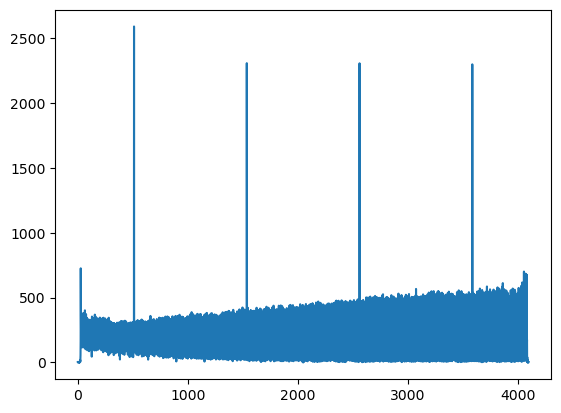

In [16]:
plt.plot(adc0)


In [17]:
adc1=np.array([6,0,0,1,0,2,0,0,0,1,0,3,1,2,0,1,4,5,2,6,6,12,19,4,26,57,95,412,723,324,300,99,348,240,330,299,293,306,305,81,288,283,302,289,290,317,278,136,317,311,295,320,253,337,260,98,294,303,278,332,257,320,270,136,275,303,273,327,270,339,265,98,261,320,233,304,271,318,255,139,279,347,282,342,252,275,283,73,228,328,248,306,238,300,293,143,254,335,256,297,282,280,275,76,237,280,232,288,234,303,300,140,268,301,231,284,263,287,307,71,234,300,242,308,239,288,264,36,245,311,237,315,234,320,248,91,254,299,215,317,225,310,220,141,259,325,237,287,246,313,267,84,294,301,218,310,241,289,214,132,270,300,246,296,228,293,259,74,289,314,247,293,242,290,268,120,253,293,247,307,221,305,242,93,263,281,240,295,255,319,232,125,237,297,248,308,244,315,264,89,248,287,284,325,238,280,270,158,252,298,244,284,223,309,262,82,281,275,239,317,269,305,271,118,274,297,253,317,265,270,288,61,236,288,276,314,222,289,283,140,258,317,253,323,237,325,253,73,248,320,251,287,270,290,270,167,277,283,308,277,279,273,290,69,278,286,263,310,290,277,294,134,270,300,307,279,294,238,296,69,236,294,271,267,291,240,315,97,272,298,290,235,284,250,326,76,275,295,281,278,269,261,322,121,242,316,320,252,274,240,343,61,283,268,289,277,241,278,328,107,288,277,290,257,312,239,317,68,259,264,301,264,323,247,321,113,288,278,321,230,297,259,261,66,275,275,299,261,307,253,314,99,292,311,294,246,318,229,306,58,284,250,288,252,310,243,318,103,261,289,301,261,339,228,301,53,283,263,328,246,310,238,323,20,243,285,300,277,255,280,289,65,288,304,264,295,271,262,279,110,224,280,306,263,303,258,297,46,291,287,274,277,305,281,290,103,265,291,302,252,274,246,332,46,259,269,272,252,276,277,337,118,285,299,302,250,304,244,281,44,275,286,304,272,296,243,323,108,257,269,299,252,319,252,315,49,276,266,283,278,312,255,309,105,269,255,296,244,305,265,347,45,275,249,313,253,298,240,308,77,292,265,325,245,314,253,353,55,301,275,298,239,312,225,317,118,286,250,300,238,317,220,328,60,321,233,296,249,304,223,351,2556,339,256,311,272,276,229,293,48,310,251,294,285,304,239,301,112,253,265,305,256,321,244,334,50,301,293,280,272,304,244,290,80,311,261,303,245,323,228,319,46,290,287,305,238,302,248,334,98,270,273,319,260,311,220,327,40,312,261,309,239,310,229,320,75,326,247,283,259,314,234,294,53,265,269,330,246,317,235,355,103,280,253,326,221,349,237,339,38,292,224,333,240,308,240,310,69,292,258,320,211,340,226,336,44,293,266,317,237,303,253,345,129,283,233,317,243,323,247,321,22,295,250,316,264,348,240,265,11,295,247,297,265,311,249,313,57,296,270,287,280,300,255,321,121,279,274,300,245,286,235,297,42,288,268,291,265,307,235,292,89,354,270,323,249,331,225,312,48,300,253,259,247,289,242,328,119,256,284,326,238,290,249,308,36,316,267,327,262,320,225,323,68,303,263,287,221,346,242,326,35,321,253,312,242,314,251,315,112,296,264,279,242,308,213,310,48,317,267,338,245,346,222,329,77,295,253,326,226,336,225,292,47,286,244,344,220,287,250,344,114,268,266,309,255,313,246,307,40,288,274,335,227,319,212,327,160,279,230,324,251,328,233,313,22,309,239,348,221,337,237,325,114,275,247,372,187,352,242,304,33,351,223,340,213,338,236,333,57,322,188,347,223,377,197,323,22,321,238,337,213,341,201,344,104,282,211,329,227,398,228,322,35,291,222,319,227,350,207,319,53,339,239,356,209,364,213,337,33,291,264,337,232,322,229,351,123,299,213,305,217,317,205,334,28,354,219,363,189,333,203,344,73,379,243,351,217,352,214,344,37,300,202,347,196,355,197,340,114,295,204,338,217,348,226,322,30,341,204,339,213,351,214,298,13,323,225,350,202,345,215,329,27,325,228,333,226,346,232,352,96,283,223,356,215,335,202,318,24,316,235,336,217,359,234,341,83,365,254,360,210,352,190,296,27,296,219,336,204,298,243,327,106,270,253,348,212,362,215,312,22,329,227,337,238,326,215,312,61,323,226,327,239,365,203,325,39,352,223,331,214,352,211,340,105,280,240,317,188,345,226,344,39,327,271,370,215,323,220,347,55,291,221,319,216,362,208,317,32,321,209,340,227,365,216,376,93,290,208,337,209,399,200,326,32,286,213,360,202,391,203,335,61,364,218,356,190,350,182,336,20,374,217,359,193,344,187,367,119,306,191,360,202,373,180,337,29,372,192,383,191,356,202,350,70,393,194,323,190,351,182,366,24,376,204,357,184,330,221,365,96,305,213,372,186,333,182,301,33,360,205,365,206,354,217,384,47,376,167,331,196,353,224,312,18,356,164,356,184,363,216,393,104,302,234,373,170,367,195,321,18,367,194,354,181,361,205,297,41,375,217,410,233,353,205,293,21,360,199,371,196,341,208,319,117,277,215,376,188,377,215,326,28,344,226,369,187,356,212,278,4,381,198,340,192,370,173,319,17,345,205,386,195,373,218,412,113,291,176,348,167,364,212,347,11,382,205,348,195,349,210,360,46,356,225,331,208,344,181,298,24,356,204,357,205,348,190,373,110,316,198,406,220,381,185,336,19,348,201,356,201,355,208,358,40,384,186,363,173,369,201,320,21,400,182,357,201,347,184,370,107,327,186,387,202,343,210,327,23,372,173,371,166,355,185,344,40,394,186,405,199,369,187,332,15,360,212,371,177,369,179,374,99,282,201,374,171,378,217,334,23,359,179,381,167,343,180,349,134,337,197,375,180,341,179,355,14,386,189,393,184,329,207,337,98,315,192,389,185,373,183,310,22,379,205,407,204,371,195,328,36,380,161,368,203,382,217,295,16,365,192,396,193,362,182,368,129,321,187,361,190,348,195,316,16,365,189,375,198,366,198,360,39,383,185,366,193,368,202,316,20,388,184,353,188,340,244,350,114,283,220,343,186,381,195,316,15,357,224,351,195,376,222,344,40,393,195,390,213,340,207,286,16,333,200,353,208,380,184,384,124,287,217,365,235,340,192,329,14,359,182,362,187,322,183,255,2,412,189,392,171,399,220,318,17,379,159,399,156,361,159,380,93,288,187,391,189,384,205,353,16,396,180,379,158,395,172,377,50,377,180,383,182,359,196,308,10,390,195,359,183,373,203,345,102,268,188,387,162,366,187,318,11,408,167,380,184,394,188,357,31,377,179,360,198,391,182,321,20,385,183,358,165,402,175,388,109,292,187,392,209,372,191,328,20,367,165,413,202,377,168,323,48,381,209,369,181,369,196,304,10,400,187,398,200,341,179,382,115,286,178,371,187,351,190,312,9,398,189,387,175,379,207,392,2267,398,177,423,149,396,172,348,7,407,182,419,149,379,169,411,79,291,155,372,161,353,169,334,9,411,197,416,157,410,164,403,27,357,168,393,143,385,151,338,12,374,178,387,179,427,193,414,88,319,152,392,138,379,165,322,9,358,163,380,171,426,187,411,23,419,181,400,164,389,167,338,10,421,179,387,146,368,147,392,89,300,172,408,179,392,192,352,13,421,184,407,160,365,154,348,25,394,134,372,146,368,177,314,8,444,173,435,148,393,154,394,114,285,140,382,161,406,178,314,5,401,161,391,172,425,186,265,2,396,169,415,158,361,172,313,9,373,170,414,121,411,146,423,78,335,168,422,176,404,172,339,8,385,163,391,154,378,157,367,24,430,164,396,168,388,180,333,12,398,166,387,164,392,124,421,103,311,172,413,159,396,156,325,8,409,155,391,180,411,141,389,13,424,154,393,147,374,181,321,7,401,141,368,157,416,162,429,111,323,125,393,149,360,202,364,5,405,176,393,133,374,160,382,30,436,167,412,156,404,171,355,9,396,151,395,152,394,154,367,98,308,147,432,151,402,165,330,8,416,150,459,149,386,137,396,133,318,161,406,138,409,158,295,7,436,150,422,152,411,160,372,144,278,167,435,157,373,151,306,5,438,169,403,175,408,167,327,16,422,171,447,155,407,179,278,7,386,160,442,151,372,182,399,121,323,170,429,174,385,179,298,10,421,152,373,152,357,159,377,28,416,159,389,171,436,166,342,4,404,148,416,161,372,167,348,103,287,147,390,173,426,171,295,9,423,171,441,179,401,148,358,30,412,154,383,166,377,185,299,6,401,161,455,166,389,186,389,119,249,190,397,137,396,150,308,5,392,142,416,144,444,171,268,1,425,140,418,132,411,187,326,4,434,113,386,121,416,163,455,107,264,161,395,123,451,192,312,9,402,133,416,142,411,154,368,22,426,159,410,159,400,145,334,3,442,145,426,157,387,142,397,120,293,152,411,131,400,163,315,4,432,125,449,166,386,151,374,10,436,141,389,127,382,156,304,8,435,128,447,139,407,154,412,110,330,165,394,159,406,155,322,4,408,159,393,142,379,150,372,18,454,175,426,140,403,179,289,3,421,141,450,133,420,170,391,127,280,144,418,162,368,209,302,6,421,135,388,137,381,117,36,0,444,158,440,148,386,178,331,9,401,162,396,167,450,172,364,97,229,145,405,157,397,152,331,6,389,176,425,157,451,160,358,22,435,153,411,161,402,128,296,4,439,154,420,168,430,153,410,104,278,180,405,141,428,147,324,4,402,159,400,124,425,153,361,9,467,176,410,122,424,155,367,4,380,138,381,129,424,143,450,93,280,148,456,143,424,126,315,4,437,155,452,160,386,131,364,10,406,148,422,159,435,115,322,6,415,187,383,135,423,131,437,103,287,193,400,147,426,152,302,1,433,147,449,119,415,139,275,0,441,155,396,153,418,156,300,4,419,168,427,144,420,155,440,129,268,152,396,146,413,154,320,3,425,157,406,154,381,125,392,20,434,157,429,131,416,143,301,2,439,163,404,139,416,158,442,105,285,165,424,124,380,151,323,7,409,147,392,150,415,136,378,10,452,150,442,147,446,130,309,2,429,159,381,148,422,146,433,87,285,157,450,147,424,132,286,7,443,164,435,133,399,146,368,15,427,130,417,133,435,144,375,3,452,178,418,131,402,115,424,82,251,166,377,136,425,122,325,3,505,157,427,122,449,122,457,120,320,123,429,115,392,118,323,1,435,144,453,131,450,118,410,97,287,153,472,123,445,134,316,1,440,132,414,112,417,88,354,7,491,145,450,117,441,111,313,1,424,144,443,105,458,125,431,68,279,122,441,118,461,122,349,4,459,145,431,102,407,95,373,9,473,131,432,118,449,118,332,5,459,140,462,96,453,129,444,89,303,102,468,114,442,123,349,2,429,111,415,116,431,114,411,4,457,124,427,118,436,112,318,2,450,117,453,109,432,131,459,109,322,123,434,107,444,126,335,3,402,134,442,105,482,111,249,1,470,135,453,122,445,119,312,2,456,128,407,124,454,113,470,89,306,138,430,94,449,142,326,1,440,125,444,111,423,112,402,6,434,142,453,102,476,116,354,1,468,135,432,98,428,112,420,94,326,127,450,120,423,106,351,4,493,134,423,106,438,108,375,7,454,121,397,91,428,118,328,2,480,143,455,122,425,131,485,96,305,117,454,99,453,108,298,3,407,120,465,102,451,132,405,8,438,119,486,104,421,113,326,1,454,123,454,114,419,117,446,102,326,124,497,98,433,120,335,3,440,121,508,100,416,111,433,2285,485,137,457,104,463,117,343,5,443,135,417,114,432,138,459,90,276,121,475,105,447,108,321,3,431,144,500,104,428,117,376,8,489,121,484,94,461,109,344,2,485,111,426,102,403,127,440,89,304,124,447,113,502,127,308,2,453,117,481,113,452,131,353,3,445,111,475,92,462,111,343,0,482,113,470,106,477,120,487,97,293,126,477,84,439,112,315,0,482,91,457,113,476,127,387,5,468,114,419,125,492,130,341,2,462,137,491,93,500,118,459,113,286,132,508,112,445,90,311,0,438,154,445,98,447,108,267,0,543,141,461,97,453,116,360,1,446,125,434,100,418,136,465,96,338,112,493,81,495,124,322,0,484,116,480,99,469,140,420,12,498,107,455,97,519,124,350,1,465,128,425,113,481,104,476,118,278,122,447,105,442,121,345,1,473,117,468,93,422,135,346,8,481,142,436,96,467,106,338,1,456,124,472,72,481,132,454,111,289,119,448,103,458,109,350,1,479,127,435,73,463,103,350,11,476,108,432,95,452,104,344,1,502,121,441,95,459,117,499,109,325,114,471,83,445,109,339,2,474,126,462,90,470,108,426,100,301,94,480,90,473,91,331,1,498,112,461,84,458,95,447,92,295,115,436,78,433,98,285,0,501,109,481,84,471,90,389,6,486,109,464,95,448,85,310,1,477,106,459,92,447,99,448,109,316,112,462,88,420,102,292,2,473,92,459,83,432,96,381,2,477,116,491,94,495,79,316,0,453,100,433,82,484,91,480,101,259,109,472,77,481,113,331,4,517,113,493,82,481,87,376,3,471,107,437,94,440,104,318,0,438,110,435,84,480,98,456,97,274,82,474,84,491,91,333,2,480,95,485,88,465,97,250,0,517,109,486,81,463,90,269,0,498,111,446,92,496,96,426,109,273,82,487,77,460,90,360,2,493,97,486,83,476,110,371,3,497,83,450,73,453,81,315,1,500,83,459,72,483,86,497,100,294,107,465,64,437,108,295,3,522,101,480,63,485,97,375,0,441,95,477,88,443,95,291,4,493,89,491,74,461,97,483,119,301,113,454,58,451,87,329,1,490,87,508,74,497,87,395,8,478,76,467,78,486,98,316,3,489,80,493,67,470,91,483,105,269,79,501,55,513,77,287,0,475,88,479,63,458,99,290,1,496,79,462,59,522,102,347,1,552,85,461,62,491,86,483,113,288,91,464,65,475,89,306,1,491,93,531,68,478,70,376,1,507,89,501,56,476,82,280,3,494,75,474,76,501,76,498,113,312,70,452,60,482,102,329,3,480,83,451,60,476,83,382,1,532,99,535,69,478,83,298,2,502,96,480,58,445,68,492,81,287,82,491,67,454,81,324,1,535,83,503,72,514,86,396,3,502,76,500,57,467,76,320,0,519,81,428,67,476,75,509,82,297,68,475,73,479,63,324,2,529,76,503,57,468,68,233,0,556,96,484,61,481,63,304,0,492,86,463,65,483,108,501,90,270,86,453,63,517,85,338,0,519,93,475,68,460,75,349,3,513,96,478,63,477,78,297,1,536,79,462,73,479,100,531,89,259,66,506,62,457,73,289,0,540,88,481,60,526,75,324,3,505,72,513,61,498,89,292,2,530,83,488,82,471,79,502,98,273,92,477,69,447,84,276,2,502,63,474,69,432,90,360,7,518,94,489,78,527,87,308,1,475,75,512,53,472,73,505,84,279,94,441,60,486,109,303,3,536,86,535,63,474,82,501,115,303,86,495,60,492,57,276,1,513,95,458,64,517,79,506,93,235,79,501,64,499,70,317,1,473,90,474,68,513,78,386,2,486,77,498,67,485,66,341,0,501,71,470,66,454,78,494,113,266,71,491,68,507,78,304,0,522,69,450,62,526,90,370,3,515,67,517,59,494,73,301,1,494,75,485,41,493,89,504,100,259,99,498,55,495,73,336,0,522,66,497,48,434,83,394,2,525,76,485,62,477,93,313,1,526,62,470,56,544,74,471,102,284,52,519,64,493,81,278,2,521,75,476,44,505,69,246,1,549,60,500,59,494,57,301,1,528,73,518,62,540,54,477,87,305,65,473,57,500,72,343,0,511,70,509,52,512,60,371,3,477,62,519,50,485,62,291,0,476,64,490,46,532,65,504,86,288,60,533,48,515,58,342,1,496,64,499,49,500,57,355,3,501,69,498,39,514,58,338,1,525,81,476,41,496,65,525,105,300,68,440,44,499,64,333,1,489,82,507,47,511,55,394,2,518,67,456,38,471,54,305,0,523,74,475,44,537,74,576,92,286,55,485,54,515,53,324,1,519,54,449,45,421,67,493,2358,540,81,508,47,469,58,288,4,546,64,524,49,506,72,511,101,254,63,464,49,486,69,297,2,528,69,553,54,511,65,379,3,518,64,497,46,469,70,297,0,506,76,526,45,499,85,520,98,253,77,500,52,464,49,295,0,540,57,483,41,501,62,327,0,561,70,537,49,510,80,289,0,497,52,552,40,488,76,507,102,306,61,483,44,522,65,306,1,531,49,499,38,464,59,372,2,504,54,482,35,517,62,316,0,514,52,526,41,545,61,514,90,298,39,491,34,495,65,288,1,518,44,493,49,526,57,286,0,576,65,545,43,496,57,330,1,476,61,499,34,445,54,539,84,311,53,470,44,470,42,337,2,520,77,486,46,498,47,346,3,519,60,550,38,460,78,319,3,595,72,492,57,462,43,514,96,257,57,512,30,459,63,295,0,579,67,482,47,520,70,349,2,538,67,484,34,490,57,305,3,506,71,521,33,538,55,543,89,229,61,531,41,453,63,294,0,527,51,550,37,610,61,318,0,488,66,501,49,505,42,268,1,477,47,493,32,495,54,509,105,278,57,514,32,545,58,299,1,519,50,504,44,481,44,544,121,305,32,537,39,548,52,313,0,559,37,484,31,492,64,500,117,304,45,482,37,479,47,316,2,575,35,496,32,517,39,387,1,565,36,489,21,502,43,335,0,543,50,503,22,492,35,600,90,295,39,469,21,520,51,336,0,524,50,519,19,502,42,364,2,548,38,494,25,524,30,305,1,452,45,525,31,447,44,502,94,259,47,473,32,525,37,256,0,519,35,551,39,465,47,346,1,502,47,482,32,462,45,278,0,499,32,547,31,496,44,479,89,260,34,491,31,486,47,312,0,462,48,501,27,505,26,243,0,522,55,474,34,502,35,325,2,521,47,448,21,416,34,497,112,255,41,519,19,491,38,336,0,610,42,484,16,469,28,381,1,499,23,494,21,518,31,265,0,554,53,529,35,511,42,546,76,235,41,500,26,510,42,292,0,542,35,577,26,580,54,335,0,554,41,561,23,556,49,308,0,659,48,568,27,622,30,596,106,328,36,597,21,608,43,388,1,663,43,625,25,638,43,469,0,687,50,760,34,674,54,428,3,697,51,667,19,653,45,642,89,220,7,69,1,15,0,1,0,6,0,2,0,1,0,5,10,])


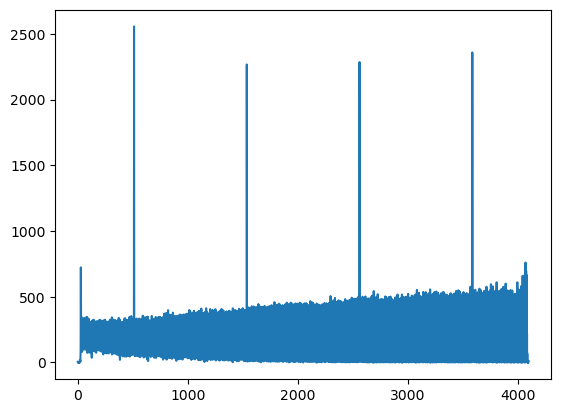

In [18]:
plt.plot(adc1)


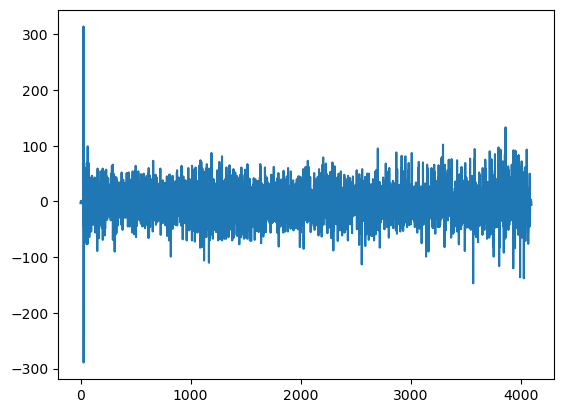

In [19]:
plt.plot(adc0-adc1)


In [20]:
adc2 = np.array([8,2,0,1,0,3,0,0,2,0,0,3,1,0,2,1,3,2,3,7,9,8,13,6,27,35,86,383,722,397,288,104,269,282,297,294,288,345,271,73,278,327,304,286,285,359,265,116,333,306,270,329,265,351,246,104,289,299,288,336,272,337,216,143,269,347,207,342,247,374,257,117,236,331,221,364,246,317,265,139,253,338,208,361,233,324,259,100,237,343,219,307,243,331,264,143,242,323,240,314,284,303,257,103,184,331,237,323,237,304,271,122,255,319,232,287,247,312,304,85,213,333,203,314,229,299,243,43,250,325,239,309,241,332,229,91,253,340,237,335,212,327,212,131,254,331,193,336,212,325,231,93,255,317,227,325,238,301,220,154,236,319,247,317,212,328,249,99,267,311,207,306,224,336,214,147,250,319,206,320,241,277,242,90,228,307,239,309,233,323,254,151,233,358,212,330,230,298,257,89,221,312,240,328,237,294,215,128,255,333,220,297,232,335,236,95,260,349,213,322,261,340,260,146,244,311,218,318,248,315,262,90,210,301,264,334,241,287,279,138,249,310,240,309,246,288,282,81,231,319,222,335,259,317,265,163,275,312,269,273,268,267,290,71,238,315,265,260,285,309,326,112,259,332,249,283,295,249,315,77,214,320,258,295,299,281,281,105,272,301,275,288,273,278,307,57,221,298,230,304,287,282,303,120,256,305,275,251,306,274,286,80,271,316,260,259,266,277,285,129,268,315,246,278,319,268,326,71,251,322,299,263,270,234,309,76,303,281,302,241,288,241,296,67,299,269,281,282,290,252,308,99,287,245,318,281,284,235,310,71,294,305,288,275,275,250,295,108,304,254,300,279,315,230,293,61,271,270,256,301,302,245,271,29,270,320,261,289,270,314,300,58,245,299,230,285,291,279,296,117,238,320,297,290,312,244,289,60,257,315,277,293,249,297,270,118,274,278,271,294,277,249,314,59,223,317,279,286,299,239,282,119,242,286,296,260,310,304,283,75,238,308,272,276,280,293,312,124,268,298,243,240,291,278,309,70,277,299,268,246,288,307,305,117,283,290,264,248,304,279,298,48,254,289,272,254,308,258,297,109,262,320,280,232,302,227,296,65,278,306,305,271,298,250,298,108,265,283,287,284,287,255,280,48,271,301,286,258,289,261,311,2627,260,310,285,277,304,272,287,71,259,308,271,265,286,281,310,106,278,276,278,262,280,255,286,77,260,286,287,272,298,240,309,103,301,273,300,256,312,242,314,53,294,281,268,248,297,253,307,119,235,290,339,259,290,234,274,61,311,280,315,244,294,281,298,114,300,274,295,291,305,235,269,55,271,256,315,265,302,250,288,131,300,245,308,245,314,249,276,51,281,271,287,231,329,261,342,89,287,284,284,261,333,254,310,39,302,266,285,226,290,260,319,109,281,256,288,263,339,260,291,44,296,275,336,261,315,243,264,14,259,296,293,279,323,256,280,53,276,286,261,280,320,247,293,118,271,288,307,256,292,254,285,45,287,264,306,238,280,267,304,112,312,294,283,287,295,270,339,42,286,282,278,253,301,208,317,134,266,270,303,227,307,284,313,48,308,278,285,252,303,244,293,83,312,257,292,264,317,255,298,50,290,289,299,262,317,246,332,109,285,250,287,238,270,245,297,52,288,280,312,244,342,232,323,103,335,284,326,250,320,215,285,31,295,261,292,223,322,257,328,101,280,256,298,262,322,213,322,51,312,260,310,249,323,232,327,138,308,255,344,210,325,232,324,34,314,226,297,229,323,220,317,101,323,232,334,224,369,223,287,39,347,237,331,204,316,245,337,89,302,240,322,231,358,231,305,36,259,246,344,246,334,247,342,116,274,225,318,234,315,214,311,48,338,210,307,214,345,226,313,66,354,258,303,208,353,219,308,40,321,225,342,198,346,242,339,93,291,246,335,217,389,224,299,26,303,249,316,231,304,224,326,65,333,228,327,221,345,273,325,40,320,243,341,221,349,244,332,94,291,215,330,199,344,239,319,34,335,223,314,213,331,237,277,16,325,236,300,264,334,212,332,37,322,267,345,249,280,234,324,114,277,271,331,217,339,192,343,35,323,219,322,219,314,228,358,68,336,231,361,224,333,202,308,38,340,287,327,224,330,214,328,94,279,229,325,203,331,222,327,26,282,250,307,251,351,232,330,89,324,236,333,217,351,213,344,36,282,240,335,239,326,240,319,98,307,234,345,240,326,198,284,32,331,246,371,212,338,211,306,81,354,213,337,221,347,242,304,37,339,239,299,210,314,207,345,112,274,245,344,202,305,217,310,35,349,217,346,231,354,231,339,42,361,232,345,220,364,241,297,31,332,236,321,209,348,223,322,112,308,246,375,221,335,237,302,13,349,205,313,200,362,202,333,45,330,219,312,196,373,232,357,26,379,192,344,200,355,220,342,113,309,198,323,199,347,227,325,23,348,240,343,230,366,220,346,56,360,191,349,188,334,223,298,20,352,222,373,211,375,245,300,89,290,242,348,227,337,193,295,31,354,199,379,159,327,211,338,65,373,232,383,217,318,229,283,28,346,228,363,211,353,202,326,123,298,241,312,205,331,263,322,21,408,195,335,202,330,246,252,6,363,199,363,198,381,185,334,16,335,242,347,213,359,222,352,97,278,179,376,184,351,211,276,15,340,195,364,209,355,224,377,35,358,223,349,204,375,204,334,14,369,188,342,167,383,232,345,83,293,221,360,184,361,219,283,27,344,206,378,210,371,234,349,44,362,178,383,176,382,228,314,20,361,206,316,197,388,222,354,107,293,217,323,189,362,179,338,19,353,213,359,174,324,232,315,62,392,240,374,179,357,224,318,15,402,222,336,176,363,227,344,117,301,201,347,167,353,254,301,23,361,188,381,169,395,211,341,117,297,241,352,207,341,228,293,19,356,195,376,173,354,237,339,124,278,222,395,220,378,211,274,15,352,219,362,215,333,197,311,41,368,218,359,200,371,231,335,16,414,219,320,183,328,201,304,121,300,233,352,180,316,211,303,21,409,215,358,200,377,219,346,24,356,192,344,214,334,233,253,14,369,213,404,209,382,228,354,126,288,189,308,190,389,206,285,12,354,195,341,213,378,204,292,64,399,237,359,184,374,212,284,23,375,201,327,213,362,243,361,109,261,187,367,189,336,217,296,20,400,211,396,205,363,198,260,3,396,190,327,147,369,204,317,19,382,181,376,185,379,228,368,131,285,183,362,217,332,222,333,11,349,168,332,176,375,227,374,41,363,174,348,209,395,220,291,9,354,211,373,184,368,218,367,98,302,221,340,168,336,195,325,18,386,205,411,174,361,207,332,39,367,209,393,203,352,197,283,13,354,199,332,182,378,211,387,127,330,203,380,183,374,201,328,12,372,177,353,168,368,211,338,47,363,204,351,188,382,219,304,16,399,177,352,180,370,212,351,101,271,185,364,203,401,206,332,13,366,210,346,183,387,186,367,2338,434,194,407,170,372,184,309,8,383,181,362,181,375,189,373,103,306,173,409,204,393,179,343,13,367,166,359,170,378,149,363,30,367,194,390,169,416,194,340,13,401,179,368,159,389,163,390,87,314,178,364,168,364,185,380,11,375,177,384,152,410,174,364,35,387,139,367,140,381,184,377,14,370,215,410,165,397,174,399,109,282,190,385,158,383,179,301,13,385,179,375,185,394,184,354,40,413,168,389,158,339,159,324,17,423,162,353,160,390,204,389,108,298,174,375,179,425,194,325,15,371,158,378,201,354,193,284,2,400,183,358,155,399,184,355,9,381,180,403,143,396,167,387,108,293,170,422,162,383,145,317,6,373,204,409,162,373,178,358,35,411,171,410,149,398,195,299,13,384,180,372,141,402,172,419,107,301,165,373,146,412,196,354,20,386,155,356,126,393,167,373,26,390,167,394,191,406,197,344,8,396,163,389,140,374,175,409,99,272,171,389,174,405,189,344,9,428,152,428,159,381,160,360,24,392,141,403,153,383,149,338,7,392,192,401,165,417,201,368,96,263,170,389,147,366,159,322,6,396,169,414,166,400,182,454,136,310,175,376,151,394,187,268,8,415,156,431,165,354,179,403,130,308,184,400,149,388,170,320,12,418,152,353,171,377,208,346,38,422,154,388,196,415,184,325,11,400,187,384,152,392,174,373,101,260,162,386,154,434,193,310,13,394,169,405,168,374,164,329,20,421,194,355,159,353,168,320,15,409,180,399,176,403,181,378,113,308,177,388,172,373,183,286,8,438,177,396,152,367,178,368,28,428,192,390,172,391,180,303,14,392,153,394,175,411,183,323,126,268,184,410,182,397,186,357,11,404,161,369,144,424,181,261,3,377,161,381,152,396,204,299,8,433,178,418,145,399,172,387,101,315,160,381,138,369,180,312,9,426,152,425,151,434,182,326,25,422,159,382,168,376,180,355,15,401,148,350,153,398,159,442,116,305,164,401,155,390,177,305,10,458,152,384,130,386,167,379,23,452,161,356,165,405,167,345,9,386,143,379,149,415,155,368,107,302,158,417,161,386,185,354,14,426,160,383,155,389,168,402,27,390,167,369,162,417,195,298,10,390,143,395,163,406,159,420,101,294,149,377,176,391,191,318,8,417,171,408,175,392,116,31,0,447,158,393,177,404,174,296,8,393,189,425,162,420,133,401,87,292,173,369,154,391,148,318,10,402,199,412,167,439,158,330,14,410,175,380,143,442,137,310,9,427,159,388,155,423,164,434,95,309,158,381,155,431,137,345,7,391,155,410,119,438,148,346,20,447,175,439,124,403,148,334,9,381,160,407,163,379,150,423,97,293,153,445,138,431,129,347,7,424,160,381,130,380,136,378,24,404,187,403,137,411,171,340,7,431,155,411,135,431,142,407,85,315,167,383,121,446,151,343,4,458,135,410,140,421,120,228,1,413,168,412,135,449,151,289,5,433,184,381,143,416,158,418,96,286,176,365,143,447,149,316,6,397,164,406,158,426,147,344,25,387,157,472,145,429,136,294,4,438,169,386,135,395,147,435,106,273,162,403,136,410,143,301,8,467,170,433,131,423,166,348,9,425,157,397,141,433,152,344,6,385,156,402,158,457,154,409,92,268,175,402,149,431,136,296,5,426,175,415,151,422,137,366,17,398,158,409,139,456,135,328,8,398,145,399,137,450,147,431,107,291,153,401,116,401,126,357,1,471,148,430,130,424,128,461,100,338,156,428,108,440,123,321,3,399,148,420,124,444,137,430,87,310,141,411,103,456,141,343,6,372,155,398,107,430,126,378,15,457,132,405,120,452,131,340,7,461,134,424,95,445,135,417,88,277,155,436,133,479,121,354,6,458,133,429,123,429,114,395,11,473,113,419,95,428,127,341,4,468,131,439,126,456,111,413,93,293,128,424,119,437,110,345,4,438,154,475,117,416,118,399,12,462,127,413,89,421,119,298,2,396,142,472,99,480,124,447,92,311,127,454,129,443,96,333,7,451,139,453,94,417,125,253,4,441,145,423,109,411,123,322,3,477,136,412,114,481,130,467,86,271,137,401,94,458,127,317,4,440,127,423,102,444,134,380,13,503,120,426,106,470,131,316,1,425,135,424,93,477,109,429,95,308,106,497,119,450,96,342,4,475,115,434,109,446,105,368,8,449,114,463,113,478,120,360,4,436,134,460,104,422,107,436,100,326,110,445,97,473,121,335,3,479,123,430,106,464,112,413,7,474,117,430,88,450,110,324,5,494,100,461,77,497,91,451,89,314,124,445,103,442,112,367,5,415,117,482,83,448,91,441,2239,501,144,481,109,475,119,286,3,471,126,460,111,487,110,438,101,323,122,403,93,457,121,296,1,415,139,466,107,505,115,414,10,478,105,442,70,453,119,337,6,464,107,466,94,477,107,468,92,301,105,469,81,459,88,340,3,475,109,462,90,463,102,364,4,520,103,458,109,505,128,320,0,472,132,475,77,460,90,436,105,324,95,494,100,492,93,324,3,460,114,492,100,479,105,363,9,470,110,506,93,473,101,369,2,479,119,435,103,508,110,478,123,286,111,494,84,501,88,326,3,484,145,444,111,506,103,248,1,500,109,457,92,474,104,374,3,500,110,518,92,508,96,446,73,307,107,458,73,509,111,329,6,496,80,472,65,498,103,372,5,493,96,479,81,476,121,332,2,516,124,477,81,495,116,437,103,297,90,496,86,507,91,290,1,486,84,460,75,506,103,369,2,532,84,447,83,522,73,328,1,495,101,471,71,486,87,493,89,284,94,487,76,455,94,330,3,500,106,517,76,479,99,399,8,463,86,481,76,495,102,345,1,444,98,482,76,428,111,490,104,279,71,462,84,516,97,361,4,480,94,472,75,496,72,461,131,333,86,452,79,466,75,339,3,478,100,468,69,520,84,486,78,295,95,459,69,471,79,314,0,488,97,460,60,477,88,375,7,504,100,487,78,488,99,338,0,467,101,441,75,479,93,475,99,262,86,487,76,494,82,327,1,480,90,474,55,436,73,359,1,465,83,424,83,515,79,353,0,516,89,473,63,525,95,461,98,275,81,433,83,469,70,317,4,454,86,483,86,490,96,401,6,492,87,492,81,501,89,273,3,482,92,487,83,458,89,475,121,278,94,468,67,472,83,344,2,465,76,474,61,457,81,243,3,553,95,511,76,515,71,339,3,491,84,456,67,444,92,494,116,306,74,428,81,469,93,327,1,525,59,440,53,496,82,369,5,540,102,494,51,444,82,340,1,517,83,481,55,489,90,457,111,288,77,491,69,493,87,285,2,515,82,479,58,500,83,379,0,478,83,496,69,482,79,310,1,438,82,455,68,458,63,475,115,328,87,513,61,518,78,327,1,490,74,506,64,523,94,362,8,479,92,468,45,498,75,342,1,531,72,491,52,489,66,460,105,293,61,419,63,509,81,308,4,519,70,519,65,532,91,329,0,489,81,495,57,523,83,333,1,512,81,454,57,436,87,477,90,282,79,534,67,484,65,329,8,444,79,522,58,499,79,387,5,486,64,484,69,507,72,320,0,479,85,463,52,504,71,496,104,272,70,485,56,486,80,330,1,547,78,485,40,507,67,386,1,538,73,465,67,533,50,377,3,515,83,461,50,463,77,469,94,265,92,498,60,526,82,352,1,513,82,467,56,492,81,361,7,476,69,538,52,466,71,335,4,495,79,498,47,436,69,497,93,337,66,502,57,496,69,326,2,499,84,456,61,526,71,197,1,510,84,462,69,558,76,274,1,499,99,448,73,513,92,484,103,302,65,520,69,484,80,291,5,539,85,495,57,504,70,325,7,497,82,430,61,529,85,279,1,510,83,484,69,503,78,473,108,289,88,444,58,510,73,311,4,463,80,500,78,504,80,373,2,545,85,499,62,449,77,259,4,523,69,487,60,469,75,477,98,289,83,489,55,523,80,321,6,511,72,469,70,523,64,345,11,506,73,468,73,509,83,353,3,527,71,472,64,477,79,494,107,275,68,520,60,469,72,286,4,548,70,477,57,497,86,480,121,333,58,527,46,461,63,278,3,475,84,489,52,510,67,564,107,295,66,512,53,475,51,360,3,522,67,495,59,506,73,324,3,441,87,488,57,505,77,278,0,509,68,523,56,589,79,487,118,245,60,474,47,535,73,299,1,530,58,483,48,517,59,356,0,500,55,503,55,543,71,280,4,564,59,452,57,520,77,517,99,239,62,481,50,530,53,317,2,522,64,462,46,511,65,348,4,530,64,485,44,532,61,328,5,526,56,501,40,525,65,522,107,265,46,478,34,523,61,345,1,510,71,495,56,461,60,246,0,496,53,473,49,523,47,339,0,541,53,460,36,508,44,523,98,336,59,509,48,521,52,337,1,517,63,492,32,535,52,419,5,545,40,492,36,520,48,316,2,496,50,456,35,520,44,536,81,321,69,523,43,510,33,345,1,514,61,481,47,557,49,314,0,530,56,491,36,546,54,332,1,564,63,465,44,533,42,535,96,281,69,515,33,509,51,314,1,523,62,508,34,517,43,343,2,530,42,473,26,542,44,311,0,531,48,523,47,504,59,556,97,298,51,481,34,505,44,293,6,477,54,496,25,520,44,573,2253,584,55,477,45,502,61,273,4,584,45,518,40,516,52,525,100,245,49,499,44,559,55,295,0,530,40,489,43,511,47,398,3,552,54,450,31,513,42,330,3,543,41,463,33,517,45,510,98,285,54,482,37,524,46,373,0,516,55,509,41,512,47,344,0,570,44,523,31,578,46,327,3,527,53,552,28,469,56,482,93,241,52,484,24,534,50,374,4,529,38,485,26,543,50,369,5,584,46,495,31,517,37,335,2,544,52,515,26,508,42,495,96,282,43,488,26,557,29,339,3,515,34,505,23,531,40,262,0,583,49,502,38,476,59,283,1,508,56,499,28,528,47,512,98,285,48,497,36,532,36,325,2,543,40,564,18,569,32,361,3,581,32,520,22,495,39,307,5,569,44,476,31,500,37,541,97,253,40,529,31,494,33,320,0,551,55,512,30,505,44,356,0,604,43,470,30,561,44,301,1,542,48,441,27,592,45,564,95,278,39,512,32,553,39,252,1,583,49,515,23,443,34,373,3,533,38,540,18,480,36,300,2,597,39,478,23,542,40,550,114,254,35,512,32,484,40,315,1,599,33,513,18,542,34,524,132,260,40,501,20,554,41,325,1,504,35,466,18,538,32,598,123,231,19,479,17,531,38,337,0,531,29,550,23,560,33,381,2,563,32,529,13,565,25,327,1,516,21,504,13,482,35,538,105,293,27,544,27,549,31,339,3,497,35,484,19,528,33,348,0,528,34,447,26,458,37,314,6,561,31,521,18,570,23,494,74,252,44,465,24,486,28,287,4,540,39,499,22,480,30,380,3,517,33,474,5,548,34,312,3,506,29,480,13,476,35,491,100,284,28,530,14,525,17,300,6,542,26,498,9,515,28,209,0,570,29,449,17,479,35,302,1,517,33,493,16,535,26,509,119,240,23,496,13,509,26,337,1,533,23,443,20,559,24,382,2,461,27,525,18,510,29,310,4,492,38,511,16,550,28,539,87,213,37,514,19,563,33,329,2,554,42,532,16,606,22,349,0,591,35,628,20,539,30,301,2,624,29,628,17,581,21,619,113,334,35,589,11,602,24,427,3,686,30,676,7,677,28,488,6,690,28,680,14,649,32,375,5,742,29,677,12,686,29,679,90,236,4,71,0,18,0,6,0,11,2,5,1,5,0,6,10,])

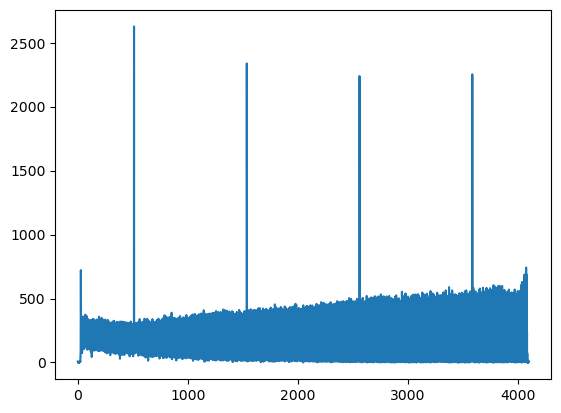

In [21]:
plt.plot(adc2)

In [23]:
adc3 = np.array([9,0,1,1,0,0,0,0,0,1,1,1,4,3,1,1,2,7,2,3,4,11,9,5,19,50,54,339,682,481,302,130,299,310,261,309,262,345,258,92,274,322,281,294,271,366,229,117,362,370,246,358,241,356,234,126,256,378,235,363,226,364,238,153,245,361,235,347,257,318,264,112,227,389,188,321,219,337,247,143,274,371,237,339,217,351,257,102,223,331,203,324,262,305,248,175,242,326,218,325,252,306,242,105,222,349,227,326,227,286,261,116,244,339,217,333,255,309,270,99,218,306,232,313,279,274,205,49,251,306,214,316,256,315,223,111,248,327,243,315,220,344,236,117,249,310,222,321,231,321,223,101,249,327,196,331,241,340,223,155,231,323,224,303,202,319,227,105,217,334,222,328,237,312,242,145,246,331,240,319,205,315,215,106,232,328,198,311,233,321,231,146,247,343,205,288,237,323,227,99,237,317,251,288,230,315,230,131,258,336,229,320,238,310,270,89,239,332,216,340,247,317,266,181,215,344,233,320,227,286,258,88,236,350,243,313,263,316,257,137,277,313,251,318,249,283,257,88,237,328,220,316,234,286,283,156,286,306,232,306,259,318,273,73,263,301,238,292,296,301,280,91,272,333,264,293,276,278,295,78,247,308,232,264,258,313,271,114,284,315,269,286,301,273,290,65,256,313,274,278,268,267,263,111,267,327,228,288,276,282,268,86,254,309,263,280,280,291,273,122,277,298,270,271,326,272,292,80,253,287,287,267,272,273,276,104,246,294,278,281,302,273,305,70,262,292,316,252,313,275,262,139,255,280,281,239,290,273,277,71,269,275,311,267,280,279,284,102,299,270,261,251,304,267,305,74,275,307,273,260,300,310,276,28,278,303,267,276,296,242,282,74,224,311,244,296,261,270,293,113,279,314,280,303,286,279,273,77,240,322,249,292,273,257,286,128,279,268,263,293,291,288,281,68,259,322,248,293,277,272,291,112,273,299,291,260,269,272,295,90,254,293,229,265,284,305,305,140,277,306,258,254,299,273,306,59,274,325,267,246,285,276,266,116,275,298,278,279,278,271,280,62,242,310,278,275,294,290,274,117,272,273,277,277,294,296,271,61,289,297,271,282,298,256,290,96,289,302,315,233,298,252,283,68,284,279,287,269,297,287,304,2597,265,259,268,279,289,281,270,61,268,295,250,292,303,277,296,93,280,311,291,255,262,274,275,52,256,327,285,260,289,287,285,112,265,291,282,279,311,283,273,60,282,315,310,266,284,279,315,103,289,294,269,230,306,264,293,62,271,256,273,282,297,273,285,81,310,268,293,283,290,256,319,49,260,271,301,286,305,258,302,121,281,264,275,254,334,287,259,56,254,272,303,260,319,243,299,99,296,261,295,247,307,271,312,51,306,298,263,243,291,265,293,121,300,285,285,251,300,262,281,71,303,271,270,251,294,279,280,22,300,281,275,240,281,249,280,60,278,323,283,267,283,297,309,102,251,309,267,288,290,267,298,47,268,310,277,268,316,261,330,99,261,284,268,237,289,283,262,59,264,264,288,272,303,289,279,131,319,302,292,272,285,259,280,42,300,278,271,268,320,252,287,102,279,288,311,269,271,267,290,58,288,279,282,274,285,267,299,132,268,283,288,264,312,261,318,46,291,280,303,254,314,243,263,109,257,251,262,252,355,265,309,56,283,314,288,245,329,247,301,111,272,239,273,244,280,255,303,56,290,280,288,258,322,280,290,153,289,254,316,237,298,264,281,65,305,260,292,247,305,264,314,104,313,254,309,235,315,230,316,45,290,253,306,233,295,271,332,78,307,300,313,241,327,257,311,49,280,254,315,203,323,258,309,97,279,262,323,253,284,277,308,43,331,289,315,197,304,237,302,88,325,251,305,235,323,283,307,46,322,222,301,230,306,267,304,111,293,231,303,224,337,274,299,45,330,236,338,235,308,251,305,78,292,262,332,227,309,241,287,41,331,240,371,254,289,235,298,112,306,255,337,243,308,232,279,37,314,270,333,214,316,242,257,17,309,266,296,257,301,227,311,38,308,268,314,211,326,253,343,129,293,230,322,257,335,243,300,45,316,227,316,215,330,227,332,80,282,248,336,231,311,237,338,47,313,255,324,207,334,278,308,100,293,252,342,223,294,227,285,41,315,239,323,210,331,247,338,73,302,273,319,249,324,255,297,41,316,235,293,225,324,247,323,134,301,247,340,238,327,252,307,39,325,251,276,195,344,249,318,72,303,259,325,250,327,235,300,47,329,248,352,224,335,208,315,109,259,239,322,235,308,238,325,43,310,271,318,216,310,225,329,68,370,224,324,252,274,292,331,36,321,245,326,231,311,226,302,110,300,250,321,238,336,238,305,30,350,255,312,234,325,220,289,73,338,255,329,209,303,249,310,31,357,285,323,252,309,204,291,97,307,253,324,211,312,220,290,41,337,248,328,229,356,264,314,77,335,222,316,209,321,284,313,41,304,220,323,218,355,258,336,103,312,225,346,220,328,266,290,32,304,224,321,234,332,226,294,75,338,243,341,253,338,246,316,30,302,221,317,203,334,245,289,116,316,244,328,226,317,249,310,30,371,243,333,232,335,237,224,8,352,221,322,211,374,260,310,26,350,216,316,217,339,246,318,103,319,226,341,217,341,235,284,36,316,212,328,203,340,222,338,76,373,221,329,216,326,230,313,28,370,219,355,185,328,224,350,109,277,219,336,226,343,259,327,29,322,228,321,192,338,231,320,63,345,222,319,227,332,243,305,29,380,258,342,225,314,246,284,115,309,197,312,213,364,265,271,27,335,246,348,260,318,240,301,59,360,209,296,195,300,220,316,29,359,214,375,217,379,235,322,106,290,243,340,222,333,230,282,33,340,211,345,208,346,240,345,146,318,243,345,225,329,242,291,28,318,211,357,201,308,231,317,126,297,232,355,214,328,253,307,25,328,216,324,216,333,235,307,73,345,216,329,236,356,269,322,23,368,217,348,229,341,221,295,104,273,230,326,236,334,210,269,38,319,233,356,251,359,217,331,57,339,236,325,223,304,236,341,21,357,235,293,230,339,220,347,134,307,237,316,217,329,221,300,26,365,258,325,197,311,245,290,69,361,244,335,223,334,217,291,29,360,215,370,215,339,215,310,96,269,214,343,225,325,243,297,28,374,236,334,233,362,196,264,5,389,228,349,212,368,195,291,25,360,229,359,246,325,233,322,123,308,209,353,193,360,222,317,22,336,194,323,182,337,229,310,78,358,213,349,224,370,267,328,24,328,219,309,186,371,207,314,104,282,222,345,225,377,225,323,15,377,220,348,189,355,216,301,56,367,223,339,185,331,205,301,16,389,228,401,221,343,211,361,121,270,205,313,206,319,225,286,23,358,231,318,198,384,237,353,69,368,206,341,197,354,226,288,24,331,212,314,214,384,215,364,105,270,221,323,221,352,225,311,23,360,188,345,201,348,197,356,2425,395,214,322,188,385,198,342,14,388,199,343,178,362,193,360,101,282,227,347,218,381,196,289,19,392,188,327,176,351,225,359,43,381,198,366,189,371,201,319,15,395,203,335,199,351,193,342,118,294,212,367,202,369,224,321,13,362,186,369,183,365,211,315,42,380,174,372,189,370,222,342,15,375,220,347,190,370,204,300,106,284,211,362,197,378,214,331,19,373,182,372,203,367,184,327,33,362,185,366,210,365,207,330,15,385,211,372,178,373,201,354,107,306,203,365,170,334,197,345,15,386,213,371,182,407,215,221,2,395,182,406,189,382,194,311,14,350,192,379,211,373,189,349,98,283,173,376,171,375,222,299,19,360,199,363,158,387,220,356,37,419,154,340,166,394,208,317,16,371,159,375,181,432,201,373,125,281,191,369,164,393,207,316,17,370,190,375,165,391,184,327,36,390,207,406,191,385,193,302,11,376,176,370,140,375,196,364,113,292,197,363,159,373,196,328,10,377,206,352,176,355,206,343,44,397,186,374,189,413,216,305,8,377,198,328,149,366,191,393,118,294,172,411,211,359,176,311,13,378,201,389,200,351,196,330,131,281,189,401,196,366,178,325,18,407,179,398,187,402,185,355,106,285,206,330,176,347,194,325,15,408,197,382,189,378,204,332,41,390,181,364,163,388,185,310,17,390,185,357,168,367,214,382,125,273,183,376,157,369,210,311,19,413,170,365,164,405,191,322,38,386,251,347,200,390,182,274,10,375,174,409,211,365,180,343,116,297,182,411,190,376,226,315,18,373,215,348,193,378,184,326,46,357,199,390,190,390,204,324,9,392,191,344,177,353,188,388,105,276,212,351,167,384,212,268,19,407,194,404,168,355,200,222,4,416,208,357,144,390,217,297,12,414,170,386,164,408,198,367,106,296,171,369,177,357,212,305,14,409,190,382,174,415,201,334,39,344,180,339,176,392,184,316,15,385,191,381,179,424,185,374,105,281,179,367,175,354,173,317,14,441,203,346,173,368,189,324,32,436,192,412,155,379,170,298,14,373,194,391,170,408,215,359,120,276,191,353,151,397,187,324,9,425,169,378,153,384,193,347,41,412,177,373,172,360,190,310,13,418,172,403,152,408,184,377,114,295,168,376,164,375,201,303,16,427,188,376,173,364,154,21,0,429,212,389,167,405,161,333,6,394,178,380,174,407,179,418,86,272,165,367,164,421,167,350,7,399,185,388,146,410,190,350,14,378,187,389,140,396,156,298,6,433,176,388,158,397,151,403,96,298,174,428,133,391,164,307,13,434,162,393,164,379,170,384,15,396,190,367,147,370,127,331,7,470,182,398,153,390,140,397,102,269,158,417,156,433,168,315,10,351,172,353,157,469,183,378,26,381,158,381,127,455,141,309,8,417,180,416,171,444,153,429,96,279,163,401,134,422,144,309,4,428,158,387,128,405,140,244,2,477,174,436,141,384,145,307,6,410,197,381,163,372,170,438,108,289,191,371,143,408,145,311,6,438,169,393,160,400,149,301,22,464,163,416,162,412,157,320,7,428,182,395,134,410,149,407,109,248,154,432,128,418,154,318,8,407,171,424,138,426,166,366,11,444,155,395,143,438,153,318,1,414,159,393,157,435,154,448,102,301,145,388,126,445,132,299,4,404,142,434,137,452,129,408,19,458,169,442,131,415,139,315,3,414,125,384,117,408,138,457,102,279,163,451,132,452,119,352,2,387,169,412,137,419,116,424,101,328,157,438,128,449,120,354,4,431,146,430,109,449,123,411,100,279,132,437,110,406,107,344,1,478,143,475,97,436,112,374,12,415,140,431,112,437,137,314,9,424,143,422,123,412,131,438,93,327,136,411,102,440,139,351,4,466,133,440,125,447,117,358,10,418,118,463,120,431,134,321,4,461,137,461,102,427,121,383,93,313,124,440,108,451,140,347,3,455,115,429,97,451,117,382,16,444,129,424,108,445,147,337,5,439,149,467,108,446,138,402,103,295,118,426,113,431,112,344,4,404,125,425,116,448,140,315,2,481,159,392,118,416,147,308,7,441,141,436,103,434,143,392,95,286,161,426,142,446,133,307,9,435,123,414,132,405,130,400,19,459,143,450,112,470,122,347,2,403,159,395,130,446,128,428,82,276,133,445,119,457,122,354,6,453,147,445,122,446,116,372,3,431,141,422,114,388,133,330,5,435,142,449,110,448,108,441,94,333,135,433,107,408,127,336,4,445,140,441,112,488,138,386,13,459,112,444,98,458,123,340,4,457,151,416,115,434,112,407,113,304,114,458,109,481,142,287,4,449,124,459,98,465,135,406,2228,494,145,477,99,468,143,333,3,432,140,414,102,450,120,432,98,308,132,417,117,451,128,360,7,429,125,418,124,484,136,378,9,455,145,428,104,501,139,333,2,424,113,416,116,421,141,465,91,306,104,440,120,442,106,336,4,461,120,447,117,468,119,331,6,519,122,471,145,439,126,346,6,421,122,442,104,468,126,434,133,301,128,464,111,477,141,340,6,447,142,450,108,452,108,361,17,434,127,407,132,463,137,338,5,475,144,473,103,497,136,485,108,304,137,417,124,445,128,320,7,478,157,463,101,458,115,241,3,463,135,478,108,498,123,352,5,472,139,437,86,465,132,444,95,321,129,446,99,440,120,329,4,440,115,489,102,495,109,385,12,479,132,449,122,465,137,326,8,458,136,416,120,469,120,446,116,278,141,422,103,477,135,332,5,459,123,450,97,450,124,351,9,489,146,455,97,451,119,330,5,477,125,464,94,475,120,449,108,284,111,428,95,488,123,369,2,452,119,457,104,456,110,393,10,463,128,443,92,472,114,311,6,465,112,453,92,490,112,454,90,310,94,462,95,512,90,336,1,466,83,452,83,426,104,440,124,332,105,392,96,415,111,327,4,511,110,464,68,460,99,479,108,300,121,462,89,466,91,310,4,494,97,456,94,481,104,381,11,512,104,441,80,464,94,294,2,454,109,435,84,479,79,389,127,280,108,485,84,471,117,350,3,491,107,461,86,473,105,330,3,481,79,451,91,478,97,339,2,488,112,470,86,427,89,476,83,283,111,468,74,442,112,336,4,499,122,455,93,457,84,376,7,452,120,460,72,437,105,317,0,497,104,410,80,465,111,481,86,265,100,469,96,494,105,306,3,476,105,476,86,452,106,266,1,483,105,490,84,471,77,318,4,442,91,467,83,516,103,454,87,280,90,471,81,550,107,293,3,464,98,435,62,492,86,381,5,502,95,478,91,448,87,296,5,473,108,468,71,482,114,475,121,287,105,475,72,471,71,329,1,481,106,485,81,452,100,347,6,472,90,459,86,483,89,381,7,486,105,504,73,480,118,434,109,291,110,453,68,452,97,330,3,484,90,430,68,518,101,380,9,493,70,460,79,432,100,343,5,470,85,456,71,462,85,496,142,252,87,506,83,503,89,346,4,458,93,484,78,466,91,281,1,526,108,445,62,497,95,328,2,488,98,451,91,451,79,451,115,319,87,448,79,447,91,333,4,508,100,495,53,494,96,355,5,491,110,422,69,479,92,341,4,445,99,444,78,537,106,516,97,298,86,479,78,456,83,307,4,484,84,469,72,429,96,371,5,497,67,501,74,481,88,332,5,502,90,470,80,473,90,445,101,295,88,499,97,464,95,303,9,474,78,483,73,461,89,349,5,557,77,459,49,463,101,315,6,484,93,525,71,467,80,485,75,319,75,492,64,474,63,323,3,522,72,489,59,469,79,246,1,522,84,487,71,509,71,329,3,522,73,510,71,469,83,489,91,282,80,447,55,504,66,288,4,494,83,465,72,490,76,397,5,477,84,507,71,502,72,306,2,531,81,449,53,461,78,499,96,289,87,491,68,530,70,334,1,515,85,495,62,512,65,342,0,515,85,451,71,467,80,279,4,489,66,499,67,529,72,512,127,286,67,527,57,470,93,312,1,513,85,464,64,449,79,383,12,521,68,508,61,478,60,315,3,468,77,495,56,512,94,485,116,299,72,499,64,472,72,315,4,498,77,467,64,491,72,496,122,275,78,482,65,485,71,326,3,515,72,509,56,514,66,531,103,293,78,486,54,480,64,295,3,523,60,470,53,489,80,383,7,531,74,493,51,493,71,330,6,526,73,482,34,524,67,473,87,258,73,486,58,522,56,288,2,498,72,471,67,510,46,382,2,511,76,493,69,547,79,307,2,511,94,487,45,479,77,446,113,265,100,452,74,491,82,310,1,506,91,494,50,510,93,381,4,505,75,480,42,480,88,315,4,533,94,474,53,451,74,457,104,284,54,484,61,493,84,323,1,522,75,460,67,517,86,243,1,554,66,469,53,490,55,317,1,499,65,531,56,478,72,503,97,312,66,469,46,488,64,317,2,496,70,473,41,497,63,396,3,493,61,474,42,517,73,362,1,516,69,468,43,513,66,490,98,297,58,494,56,509,78,352,3,501,49,468,50,479,58,369,2,538,72,491,50,506,65,342,7,528,58,505,36,473,45,511,88,280,57,476,43,510,50,336,2,500,67,503,44,484,77,380,4,544,68,504,42,528,59,325,1,493,76,492,49,487,67,489,90,271,76,510,60,509,70,345,1,531,61,508,39,520,61,532,2320,490,62,472,49,481,69,293,3,492,60,521,60,467,63,556,96,284,71,530,61,472,78,293,2,508,76,473,52,474,60,362,3,541,62,498,54,531,66,285,4,526,62,507,56,506,58,510,114,321,70,473,46,502,74,277,6,492,58,467,51,513,64,347,0,558,56,500,44,480,74,285,2,497,61,476,48,527,62,501,92,260,49,495,28,506,88,342,3,600,65,521,40,509,70,316,6,520,61,515,42,506,69,318,0,481,54,525,38,568,63,476,104,302,44,498,38,484,59,330,1,518,58,476,35,495,42,274,0,575,64,504,51,517,59,339,2,490,60,461,39,494,60,502,110,312,72,487,58,523,41,334,2,533,57,502,39,492,53,363,5,510,50,467,36,504,53,296,3,577,60,502,44,525,49,507,90,290,42,528,31,483,46,296,5,528,60,482,46,529,56,309,2,553,53,518,46,576,53,323,1,503,74,450,57,482,75,522,96,262,64,494,58,453,58,288,4,475,60,492,55,508,68,361,9,532,69,529,48,573,51,287,2,492,77,462,49,545,71,479,103,266,89,497,48,486,57,301,4,512,61,451,50,528,75,505,112,343,57,481,44,502,61,291,3,474,57,478,42,476,60,527,91,256,56,496,53,522,66,346,3,551,49,490,46,527,66,362,4,504,56,470,51,508,52,318,3,504,46,491,31,514,42,531,112,303,49,476,47,489,67,321,4,512,56,474,37,528,45,369,0,564,41,467,32,524,52,311,1,495,44,461,30,430,60,502,72,303,40,548,41,478,46,316,2,473,39,453,36,451,60,334,5,525,63,443,48,434,53,265,0,488,51,524,38,458,67,486,118,245,52,478,34,446,47,307,1,489,45,452,44,524,50,217,1,519,63,453,30,500,64,296,2,486,49,480,38,483,48,509,113,250,56,503,37,483,46,305,3,540,47,475,31,441,46,341,4,519,61,470,30,472,45,297,4,627,55,493,38,471,54,548,73,304,41,502,37,562,58,320,5,527,51,453,51,530,52,352,0,579,56,574,38,548,46,320,5,583,56,509,50,619,70,616,135,332,45,589,47,600,64,361,3,687,62,612,26,664,63,462,5,711,64,656,42,626,47,419,3,732,64,612,34,605,61,568,107,216,9,46,2,20,1,6,0,8,1,6,1,4,0,4,7,])

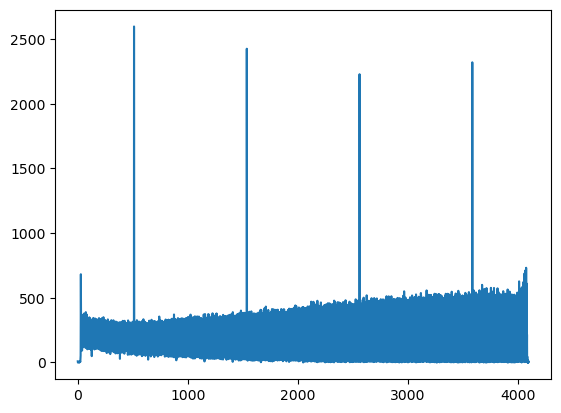

In [25]:
plt.plot(adc3)

In [28]:
from scipy.spatial.distance import pdist, squareform, euclidean

In [30]:
# Method 1: Pairwise distances (all combinations)
# Stack arrays into a 2D array (each row is one array)
a=adc0
b=adc1
c=adc2
d=adc3
arrays = np.array([adc0, adc1, adc2, adc3])

# Compute all pairwise distances (returns condensed distance matrix)
distances = pdist(arrays, metric='euclidean')
# Convert to square form for easier reading
distance_matrix = squareform(distances)

print("Distance matrix:")
print(distance_matrix)
print("\nPairwise distances:", distances)

# Method 2: Manual calculation for specific pairs
print("\nManual calculations:")
print(f"Distance a-b: {euclidean(a, b):.3f}")
print(f"Distance a-c: {euclidean(a, c):.3f}")
print(f"Distance a-d: {euclidean(a, d):.3f}")
print(f"Distance b-c: {euclidean(b, c):.3f}")
print(f"Distance b-d: {euclidean(b, d):.3f}")
print(f"Distance c-d: {euclidean(c, d):.3f}")

# Method 3: Using numpy only (Euclidean distance)
print("\nNumpy-only Euclidean distances:")
print(f"Distance a-b: {np.linalg.norm(a - b):.3f}")
print(f"Distance a-c: {np.linalg.norm(a - c):.3f}")

# Method 4: Other distance metrics
from scipy.spatial.distance import cityblock, cosine

print("\nManhattan/Cityblock distance a-b:", cityblock(a, b))
print("Cosine distance a-b:", cosine(a, b))

Distance matrix:
[[   0.         1850.36645019 1719.44758571 1778.84794179]
 [1850.36645019    0.         1713.46899593 1934.90206471]
 [1719.44758571 1713.46899593    0.         1819.67909259]
 [1778.84794179 1934.90206471 1819.67909259    0.        ]]

Pairwise distances: [1850.36645019 1719.44758571 1778.84794179 1713.46899593 1934.90206471
 1819.67909259]

Manual calculations:
Distance a-b: 1850.366
Distance a-c: 1719.448
Distance a-d: 1778.848
Distance b-c: 1713.469
Distance b-d: 1934.902
Distance c-d: 1819.679

Numpy-only Euclidean distances:
Distance a-b: 1850.366
Distance a-c: 1719.448

Manhattan/Cityblock distance a-b: 86788
Cosine distance a-b: 0.004411437561890774


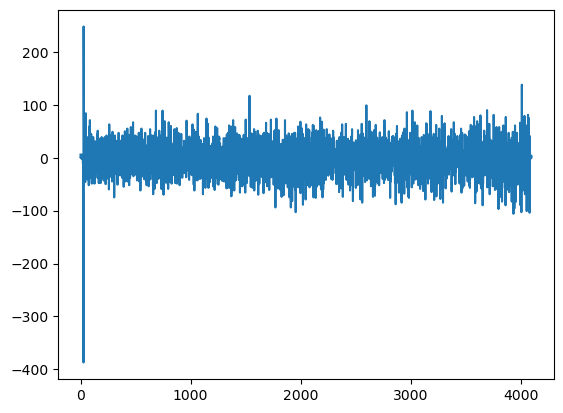

In [35]:

plt.plot(adc3-adc0)

ADC2 range: 22 - 4088
ADC3 range: 21 - 4084

ADC2 spike codes: [ 511 1535 2559 3583]
ADC3 spike codes: [ 511 1535 2559 3583]


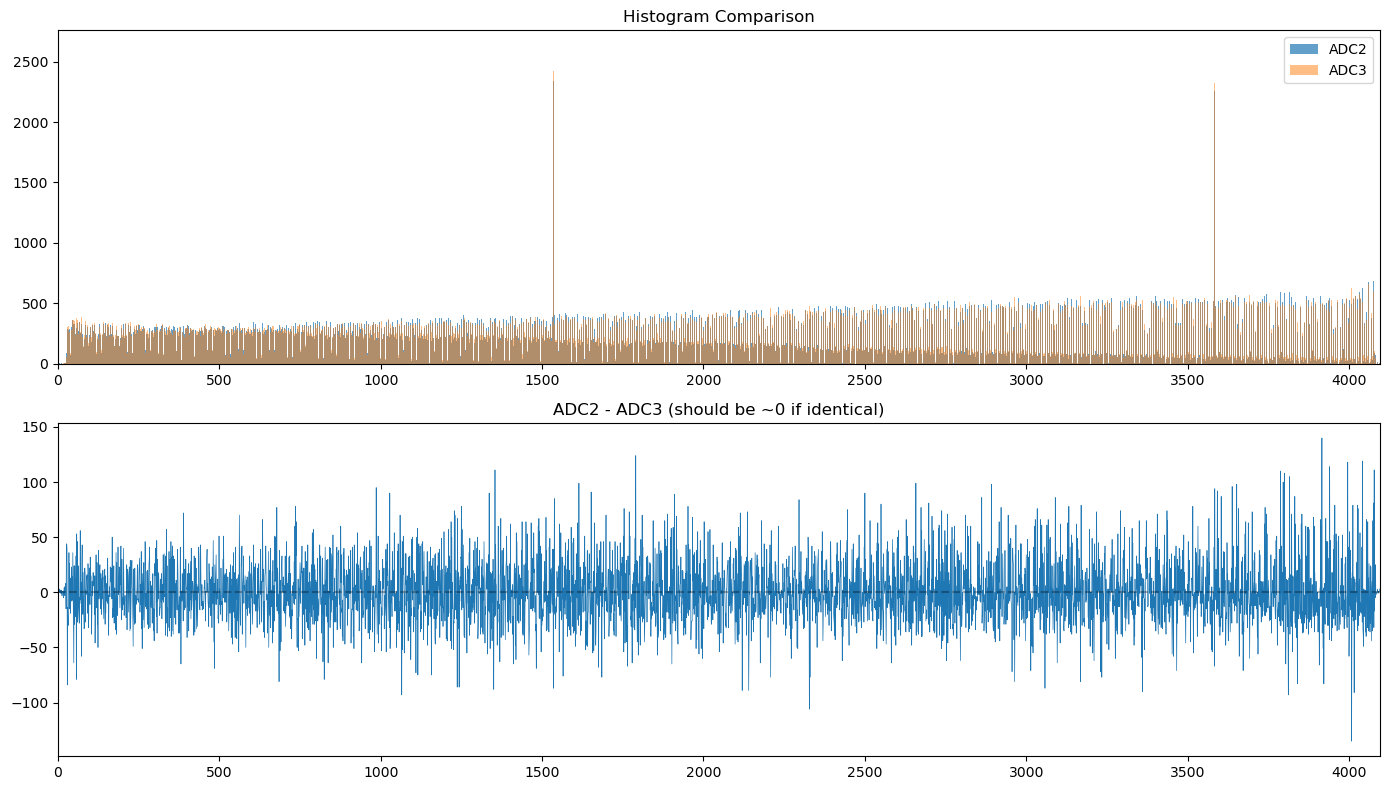


Mean difference: -0.0
Std difference: 28.5


In [37]:



# Find valid ranges
valid2 = np.where(adc2 > 10)[0]
valid3 = np.where(adc3 > 10)[0]

print(f"ADC2 range: {valid2.min()} - {valid2.max()}")
print(f"ADC3 range: {valid3.min()} - {valid3.max()}")

# Compare spike locations
threshold = 1500
spikes2 = np.where(adc2 > threshold)[0]
spikes3 = np.where(adc3 > threshold)[0]

print(f"\nADC2 spike codes: {spikes2}")
print(f"ADC3 spike codes: {spikes3}")

# Plot overlay
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].bar(np.arange(4096), adc2, width=1, alpha=0.7, label='ADC2')
axes[0].bar(np.arange(4096), adc3, width=1, alpha=0.5, label='ADC3')
axes[0].set_title('Histogram Comparison')
axes[0].legend()
axes[0].set_xlim(0, 4096)

# Difference plot
diff = adc2.astype(float) - adc3.astype(float)
axes[1].plot(diff, linewidth=0.5)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1].set_title('ADC2 - ADC3 (should be ~0 if identical)')
axes[1].set_xlim(0, 4096)

plt.tight_layout()
plt.show()

print(f"\nMean difference: {diff[valid2.min():valid2.max()].mean():.1f}")
print(f"Std difference: {diff[valid2.min():valid2.max()].std():.1f}")